# Project 7 : Introduction to Neural Networks - Bank Churn Prediction

#### By   : Rakesh Jyothi Krishnan
#### Batch: PGP - ARTIFICIAL INTELLIGENCE & MACHINE LEARNING . PGP-AIML-BA-UTA-Sept'21-A
#### Date : 04/08/2022
---

# Description

## Background & Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## Data Dictionary

- **CustomerId:** Unique ID which is assigned to each customer
- **Surname:** Last name of the customer 
- **CreditScore:** It defines the credit history of the customer.  
- **Geography:** A customer’s location    
- **Gender:** It defines the Gender of the customer   
- **Age:** Age of the customer     
- **Tenure:** Number of years for which the customer has been with the bank
- **NumOfProducts:** It refers to the number of products that a customer has purchased through the bank.
- **Balance:** Account balance
- **HasCrCard:** It is a categorical variable that decides whether the customer has a credit card or not.
- **EstimatedSalary:** Estimated salary 
- **isActiveMember:** It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- **Excited:** It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 

    0=No ( Customer did not leave the bank )
    
    1=Yes ( Customer left the bank )

### Table of Contents

1. <a href='#1. Import  Libraries'>Import  Libraries</a>

2. <a href='#2. Load Data'>Load Data</a>

3. <a href='#3. View Data'>View Data</a>
 
4. <a href='#4. Exploratory Data Analysis'>Exploratory Data Analysis</a>

    A. <a href='#A. Univariate Analysis'>Univariate Analysis</a>
    
    B. <a href='#B. Bivariate & Multivariate Analysis'>Bivariate & Multivariate Analysis</a>
    
5. <a href='5. Insights Based On EDA'>Insights Based On EDA</a>

6. <a href='#6. Data Preprocessing'>Data Preprocessing</a>

    A. <a href='#A. Drop Columns'>Drop Columns</a>
    
    B. <a href='#B. Check Duplicates & Clean-up'>Check Duplicates & Clean-up</a>
    
    C. <a href='#C. Feature Engineering'>Feature Engineering</a>
    
    D. <a href='#D. Check Outlier & Treatment'>Check Outlier & Treatment</a>
    
    E. <a href='#E. Data Split - Training & Test'>Data Split - Training & Test</a>
    
    F. <a href='#F. Check Data Split'>Check Data Split</a>
    
    G. <a href='#G. Check Missing Value & Treatment'>Check Missing Value & Treatment</a>
    
    H. <a href='#H. One Hot Encoding'>One Hot Encoding</a>
    
    I. <a href='#I. Scale Data'>Scale Data</a>
    
    J. <a href='#J. Transform Data'>Transform Data</a>
    
    
7. <a href='#7. Model Building'>Model Building</a> 

8. <a href='#8. Model Hyperparameter Tuning'>Model Hyperparameter Tuning</a> 

    A. <a href='#A. RandomizedSearchCV Tuning'>RandomizedSearchCV Tuning</a>
    
    B. <a href='#B. KerasTuner Tuning'>KerasTuner Tuning</a>
    
9. <a href='#9. Model Performance Evaluation'>Model Performance Evaluation</a> 

10. <a href='#10. Conclusion and key takeaways'>Conclusion and key takeaways</a> 

### 1. Import  Libraries <a id='1. Import  Libraries'></a>

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warning messages
import warnings

warnings.filterwarnings("ignore")

# to set background color in plots
sns.set(color_codes=True)

# to print plots inline
%matplotlib inline
# pd.options.display.float_format = '{:,.2f}'.format

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# For data scaling
from sklearn.preprocessing import StandardScaler,RobustScaler

# For One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# To get diferent metric scores
from sklearn import metrics

# To import tensorflow and keras for ANN models
import tensorflow as tf

tf.__version__

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Input,
    Dropout,
    BatchNormalization,
    InputLayer,
)
from keras import callbacks
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

# To oversample and undersample data
from imblearn.over_sampling import SMOTE

# To transform columsn selectively
from sklearn.compose import ColumnTransformer

# To visualize feature importance
import shap

<IPython.core.display.Javascript object>

In [2]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

<IPython.core.display.Javascript object>

In [3]:
import keras_tuner as kt

<IPython.core.display.Javascript object>

In [4]:
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

### 2. Load Data <a id='2. Load Data'></a>

In [5]:
# Read data from csv file using pandas and create DataFrame object as Analytic Base Table
churn_data_ABT = pd.read_csv("Churn.csv")

<IPython.core.display.Javascript object>

In [6]:
# Make a copy of Analytic Base Table for further analysis and model building
churn_data = churn_data_ABT.copy()

<IPython.core.display.Javascript object>

### 3. View Data <a id='3. View Data'></a>

In [7]:
# checking number of columns and rows
print(f"There are {churn_data.shape[0]} rows and {churn_data.shape[1]} columns.")

There are 10000 rows and 14 columns.


<IPython.core.display.Javascript object>

In [8]:
# Check datatypes of each columns
churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<IPython.core.display.Javascript object>

In [9]:
# Get non object type columns
churn_data.select_dtypes(exclude="object").columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<IPython.core.display.Javascript object>

#### Observation : 
1. Column names and its data types are listed
2. Columns 'RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary' and 'Exited' are integer data type
3. Columns 'Surname','Geography' and 'Gender' are object datatypes. They must be checked further in order to convert them as a category or not.

In [10]:
# Additional check on data for null values
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

#### Observation : 
1. Row index is from 0 to 9999. Total rows are 10000
2. Column index is from 0 to 13. Total columns are 14
3. There are no null values in columns
4. **The target variable is "Exited."** It does not have null values

In [11]:
# Check head
churn_data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

<IPython.core.display.Javascript object>

In [12]:
# Check tail
churn_data.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

<IPython.core.display.Javascript object>

In [13]:
# Check sample
churn_data.sample(5)

RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
9953       9954    15655952       Burke          550    France    Male   47   
3850       3851    15775293  Stephenson          680    France    Male   34   
4962       4963    15665088      Gordon          531    France  Female   42   
3886       3887    15720941        Tien          710   Germany    Male   34   
5437       5438    15733476    Gonzalez          543   Germany    Male   30   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9953       2       0.00              2          1               1   
3850       3  143292.95              1          1               0   
4962       2       0.00              2          0               1   
3886       8  147833.30              2          0               1   
5437       6   73481.05              1          1               1   

      EstimatedSalary  Exited  
9953         97057.28       0  
3850         66526.01       0  
4962         90537.47       0  
3886          1561.58       0  
5437        176692.65       0

<IPython.core.display.Javascript object>

#### Observation : 
1. Column "RowNumber" and "CustomerId" are unique and can be dropped.
2. Column "Surname" is personal to each customer. It doesnt add value to model. So it can be dropped.
3. Columns "CreditScore", "Age", "Balance" and "EstimatedSalary" are numerical and continous variables.
4. Columns "Tenure", "NumOfProducts", "HasCrCard" and "IsActiveMember" are numerical and discrete variables.
5. Columns "Geography" and "Gender" are categorical variables.
6. **Column "Exited" is the target variable.** Value "0" is for "Customer did not leave bank within six months" and value "1" is for "Customer left bank within six months".


In [14]:
# Check basic summary
churn_data.describe(include="all").T

count unique     top  freq           mean           std  \
RowNumber        10000.0    NaN     NaN   NaN         5000.5    2886.89568   
CustomerId       10000.0    NaN     NaN   NaN  15690940.5694  71936.186123   
Surname            10000   2932   Smith    32            NaN           NaN   
CreditScore      10000.0    NaN     NaN   NaN       650.5288     96.653299   
Geography          10000      3  France  5014            NaN           NaN   
Gender             10000      2    Male  5457            NaN           NaN   
Age              10000.0    NaN     NaN   NaN        38.9218     10.487806   
Tenure           10000.0    NaN     NaN   NaN         5.0128      2.892174   
Balance          10000.0    NaN     NaN   NaN   76485.889288  62397.405202   
NumOfProducts    10000.0    NaN     NaN   NaN         1.5302      0.581654   
HasCrCard        10000.0    NaN     NaN   NaN         0.7055       0.45584   
IsActiveMember   10000.0    NaN     NaN   NaN         0.5151      0.499797   
EstimatedSalary  10000.0    NaN     NaN   NaN  100090.239881  57510.492818   
Exited           10000.0    NaN     NaN   NaN         0.2037      0.402769   

                        min          25%         50%          75%         max  
RowNumber               1.0      2500.75      5000.5      7500.25     10000.0  
CustomerId       15565701.0  15628528.25  15690738.0  15753233.75  15815690.0  
Surname                 NaN          NaN         NaN          NaN         NaN  
CreditScore           350.0        584.0       652.0        718.0       850.0  
Geography               NaN          NaN         NaN          NaN         NaN  
Gender                  NaN          NaN         NaN          NaN         NaN  
Age                    18.0         32.0        37.0         44.0        92.0  
Tenure                  0.0          3.0         5.0          7.0        10.0  
Balance                 0.0          0.0    97198.54    127644.24   250898.09  
NumOfProducts           1.0          1.0         1.0          2.0         4.0  
HasCrCard               0.0          0.0         1.0          1.0         1.0  
IsActiveMember          0.0          0.0         1.0          1.0         1.0  
EstimatedSalary       11.58     51002.11  100193.915  149388.2475   199992.48  
Exited                  0.0          0.0         0.0          0.0         1.0

<IPython.core.display.Javascript object>

#### Observation : 
1. There are no missing values in any columns
2. Columns "Geography" and "Gender" are categorical variables. OneHotEncoding can be applied on these columns.
3. Columns "CreditScore", "Age", "Balance" and "EstimatedSalary" are numerical and continous variables.
4. Columns "Tenure", "NumOfProducts", "HasCrCard" and "IsActiveMember" are numerical and discrete variables.


### 4. Exploratory Data Analysis <a id='4. Exploratory Data Analysis'></a>

#### A. Univariate Analysis <a id='A. Univariate Analysis'></a>

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def hist_boxplot(data, column, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=False,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(data=data, x=column, ax=ax_box2, showmeans=True, color="lightsalmon")
    sns.histplot(
        data=data, x=column, kde=kde, ax=ax_hist2, bins=bins, color="cornflowerblue"
    ) if bins else sns.histplot(
        data=data, x=column, kde=kde, ax=ax_hist2, color="cornflowerblue"
    )
    ax_hist2.axvline(data[column].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[column].median(), color="black", linestyle="-")
    plt.show()

<IPython.core.display.Javascript object>

In [16]:
# function to create labeled barplots


def labeled_barplot(data, column, perc=False, n=None, h=None, fig_size=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[column])  # length of the column
    count = data[column].nunique()

    if h is None:
        l = 0
    else:
        l = 20

    if fig_size is not None:
        plt.figure(figsize=(fig_size))
    else:
        if n is None:
            plt.figure(figsize=(l + count + 1, 5))
        else:
            plt.figure(figsize=(l + n + 2, 5))

    plt.xticks(rotation=45, fontsize=13)
    ax = sns.countplot(
        data=data,
        x=column,
        hue=h,
        palette="pastel",
        order=data[column].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

<IPython.core.display.Javascript object>

In [17]:
# Check datatypes of columns and apply above functions according to column data type
churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<IPython.core.display.Javascript object>

##### Univariate Analysis - Column "CreditScore"

In [18]:
# Basic summary
churn_data[["CreditScore"]].describe()

CreditScore
count  10000.000000
mean     650.528800
std       96.653299
min      350.000000
25%      584.000000
50%      652.000000
75%      718.000000
max      850.000000

<IPython.core.display.Javascript object>

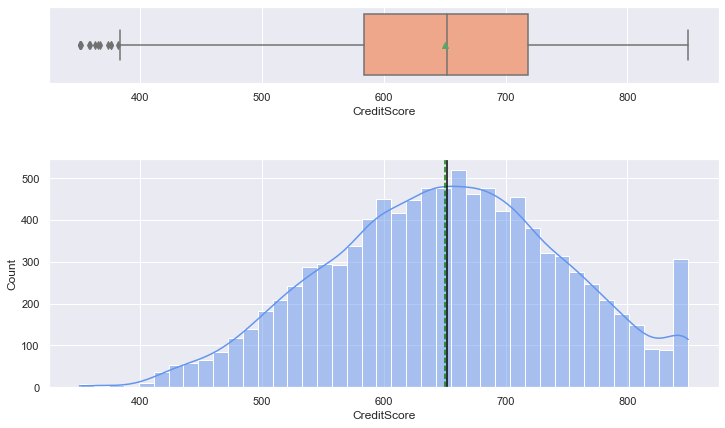

<IPython.core.display.Javascript object>

In [19]:
# Visualize data through plot
hist_boxplot(churn_data, "CreditScore", kde=True)

#### Observation of  column "CreditScore": 
1. It looks like a normal distribution.
2. It is slightly skewed.
3. It has few outliers. But, they seems to be very close to lower whisker. So it can be legitimate values.
4. Mean and Median are same.
5. Mean is 650 and median is 652.
6. There are no missing values.

In [20]:
# Create bins for CreditScore for ploting purpose
churn_data["CreditScore_Bin"] = pd.cut(
    churn_data["CreditScore"],
    [300, 400, 500, 600, 700, 800, 900],
    labels=[
        "300 to 400",
        "401 to 500",
        "501 to 600",
        "601 to 700",
        "701 to 800",
        "801 to 900",
    ],
)

<IPython.core.display.Javascript object>

In [21]:
# Basic summary
churn_data[["CreditScore_Bin"]].describe()

CreditScore_Bin
count            10000
unique               6
top         601 to 700
freq              3818

<IPython.core.display.Javascript object>

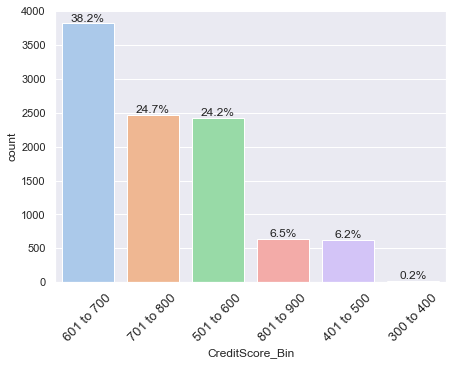

<IPython.core.display.Javascript object>

In [22]:
# Visualize data through plot
labeled_barplot(churn_data, "CreditScore_Bin", perc=True)

#### Observation of  column "CreditScore_Bin": 
1. Most of the customers fall under CreditScore range 601-700
2. Second most of the customers fall under CreditScore range 701-800
3. Third most of the customers fall under CreditScore range 501-600

##### Univariate Analysis - Column "Geography"

In [23]:
# Basic summary
churn_data[["Geography"]].describe()

Geography
count      10000
unique         3
top       France
freq        5014

<IPython.core.display.Javascript object>

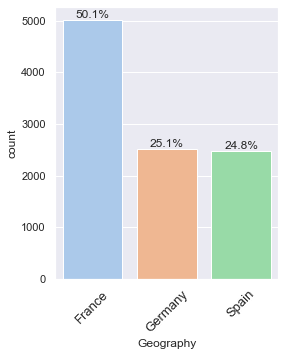

<IPython.core.display.Javascript object>

In [24]:
# Visualize data through plot
labeled_barplot(churn_data, "Geography", perc=True)

#### Observation of  column "Geography": 
1. This is a categorical variable
2. There are only three values "France", "Germany" and "Spain"
3. Most of the customers were from "France" (50.1%). Followed by "Germany" (25.1%) and "Spain" (24.8%)
4. There are no missing values

##### Univariate Analysis - Column "Gender"

In [25]:
# Basic summary
churn_data[["Gender"]].describe()

Gender
count   10000
unique      2
top      Male
freq     5457

<IPython.core.display.Javascript object>

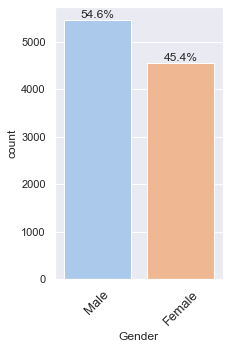

<IPython.core.display.Javascript object>

In [26]:
# Visualize data through plot
labeled_barplot(churn_data, "Gender", perc=True)

#### Observation of  column "Gender": 
1. This is a categorical variable
2. There are only two values "Male" and "Female"
3. Most of the customers were from "Male" (54.6%). Followed by "Female" (45.4%)
4. There are no missing values

##### Univariate Analysis - Column "Age"

In [27]:
# Basic summary
churn_data[["Age"]].describe()

Age
count  10000.000000
mean      38.921800
std       10.487806
min       18.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       92.000000

<IPython.core.display.Javascript object>

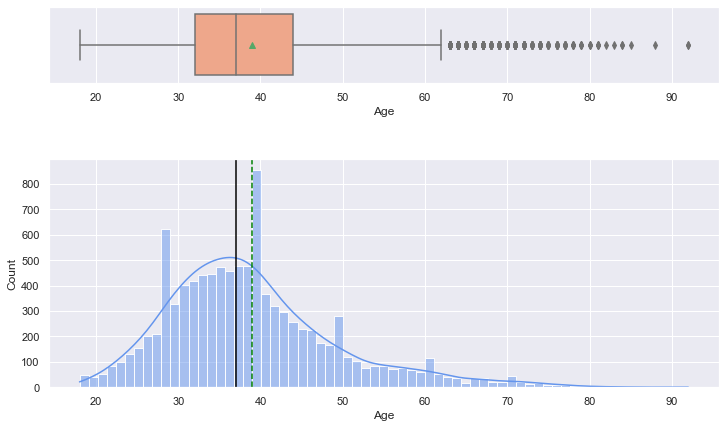

<IPython.core.display.Javascript object>

In [28]:
# Visualize data through plot
hist_boxplot(churn_data, "Age", kde=True)

#### Observation of  column "Age": 
1. It looks like a normal distribution.
2. It is right skewed
3. It has outliers. But, they seems to be very close to each other at upper whisker. So it can be legitimate values.
4. Mean and Median are almost same
5. Mean is 39 and median is 37
6. There are no missing values

In [29]:
# Create bins for Age for ploting purpose
churn_data["Age_Bin"] = pd.cut(
    churn_data["Age"],
    [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    labels=[
        "Less than 20",
        "21 to 30",
        "31 to 40",
        "41 to 50",
        "51 to 60",
        "61 to 70",
        "71 to 80",
        "81 to 90",
        "Above 90",
    ],
)

<IPython.core.display.Javascript object>

In [30]:
# Basic summary
churn_data[["Age_Bin"]].describe()

Age_Bin
count      10000
unique         9
top     31 to 40
freq        4451

<IPython.core.display.Javascript object>

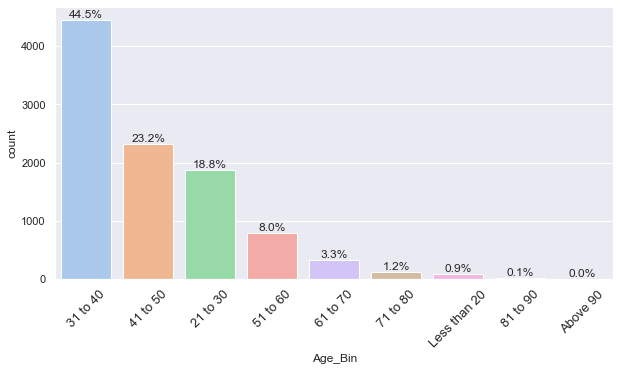

<IPython.core.display.Javascript object>

In [31]:
# Visualize data through plot
labeled_barplot(churn_data, "Age_Bin", perc=True)

#### Observation of  column "Age_Bin": 
1. Most of the customers fall under age range 31-40
2. Second most of the customers fall under age range 41-50
3. Third most of the customers fall under age range 21-30

##### Univariate Analysis - Column "Tenure"

In [32]:
# Basic summary
churn_data[["Tenure"]].describe()

Tenure
count  10000.000000
mean       5.012800
std        2.892174
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       10.000000

<IPython.core.display.Javascript object>

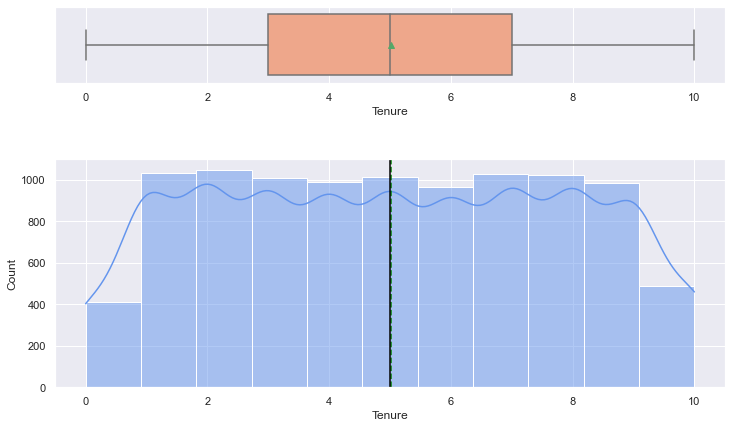

<IPython.core.display.Javascript object>

In [33]:
# Visualize data through plot
hist_boxplot(churn_data, "Tenure", kde=True, bins=11)

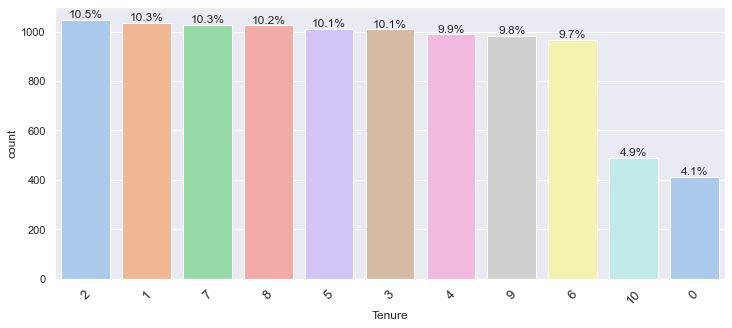

<IPython.core.display.Javascript object>

In [34]:
# Visualize data through plot
labeled_barplot(churn_data, "Tenure", perc=True)

#### Observation of  column "Tenure": 
1. This is a numerical variable. But, has discrete values.
2. There are only 11 values from 0 to 10.
3. Most of the customers were having tenure from 1 to 9 almost at same percentage.
4. There are no missing values

##### Univariate Analysis - Column "Balance"

In [35]:
# Basic summary
churn_data[["Balance"]].describe()

Balance
count   10000.000000
mean    76485.889288
std     62397.405202
min         0.000000
25%         0.000000
50%     97198.540000
75%    127644.240000
max    250898.090000

<IPython.core.display.Javascript object>

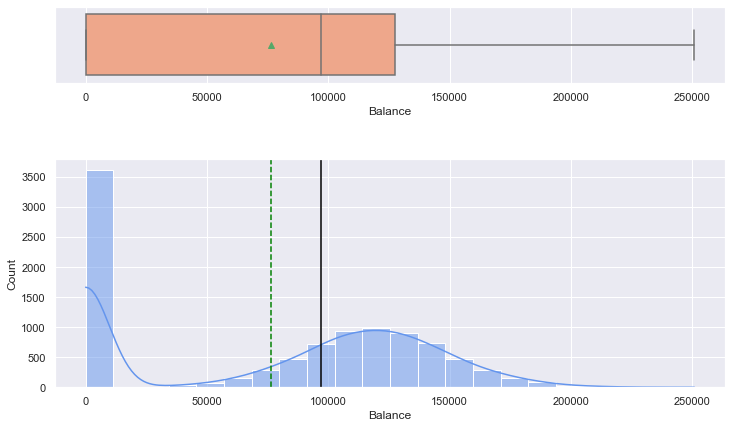

<IPython.core.display.Javascript object>

In [36]:
# Visualize data through plot
hist_boxplot(churn_data, "Balance", kde=True)

In [37]:
# Basic summary
churn_data.where(churn_data["Balance"] > 0)[["Balance"]].describe()

Balance
count    6383.000000
mean   119827.493793
std     30095.056462
min      3768.690000
25%    100181.975000
50%    119839.690000
75%    139512.290000
max    250898.090000

<IPython.core.display.Javascript object>

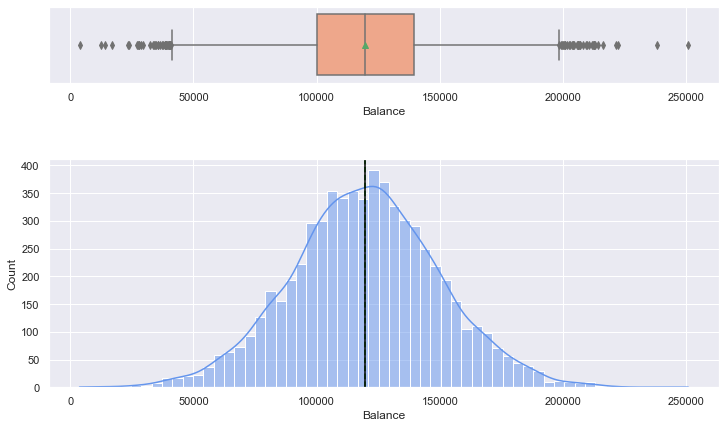

<IPython.core.display.Javascript object>

In [38]:
# Visualize data through plot
hist_boxplot(churn_data.where(churn_data["Balance"] > 0), "Balance", kde=True)

#### Observation of  column "Balance": 
1. There are lot of zero values.
2. Distribution looks like normal when only balances greater than zero is considered.
3. It is not skewed when only balances greater than zero is considered.
4. It has no outliers. But, they are lot of zero values.
5. Mean and Median are almost same if zeroes are ignored.
6. Mean is 62,397 and median is 97,198
7. There are no missing values

In [39]:
# Create bins for Balance for ploting purpose
churn_data["Balance_Bin"] = pd.cut(
    churn_data["Balance"],
    [-np.inf, 0, 50000, 100000, 150000, 200000, 250000, np.inf],
    labels=[
        "Zeroes",
        "1 to 50000",
        "50001 to 100000",
        "100001 to 150000",
        "150001 to 200000",
        "200001 to 250000",
        "Above 250000",
    ],
)

<IPython.core.display.Javascript object>

In [40]:
# Basic summary
churn_data[["Balance_Bin"]].describe()

Balance_Bin
count              10000
unique                 7
top     100001 to 150000
freq                3830

<IPython.core.display.Javascript object>

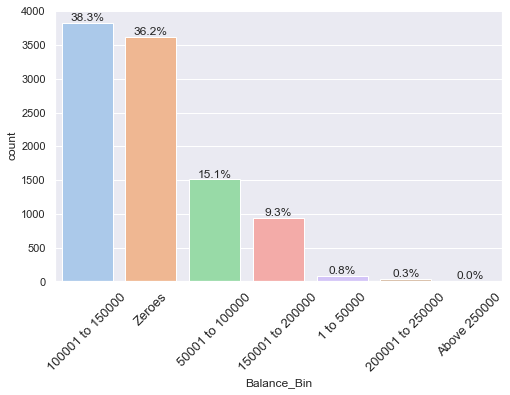

<IPython.core.display.Javascript object>

In [41]:
# Visualize data through plot
labeled_barplot(churn_data, "Balance_Bin", perc=True)

#### Observation of  column "Balance_Bin": 
1. Most of the customers fall under balance range 100001-150000
2. Second most of the customers fall under balance 0
3. Third most of the customers fall under balance range 50001-100000

##### Univariate Analysis - Column "NumOfProducts"

In [42]:
# Basic summary
churn_data[["NumOfProducts"]].describe()

NumOfProducts
count   10000.000000
mean        1.530200
std         0.581654
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000

<IPython.core.display.Javascript object>

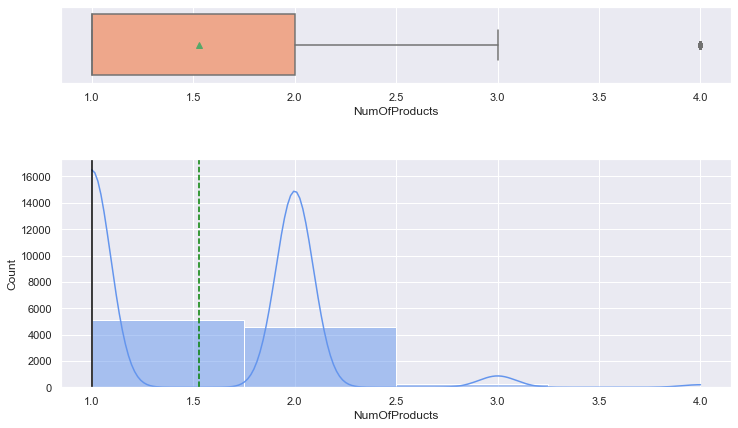

<IPython.core.display.Javascript object>

In [43]:
# Visualize data through plot
hist_boxplot(churn_data, "NumOfProducts", kde=True, bins=4)

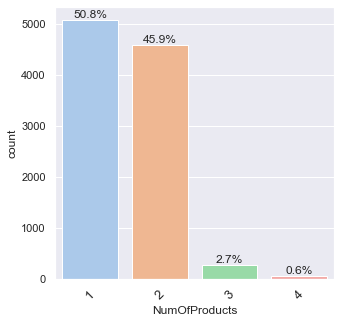

<IPython.core.display.Javascript object>

In [44]:
# Visualize data through plot
labeled_barplot(churn_data, "NumOfProducts", perc=True)

#### Observation of  column "NumOfProducts": 
1. This is a numerical variable. But, has discrete values.
2. There are only 4 values from 1 to 4.
3. Most of the customers were having products 1 (50.8%). Followed by 2 (45.9%), 3 (2.7%) and 4 (0.6%)
4. There are no missing values

##### Univariate Analysis - Column "HasCrCard"

In [45]:
# Basic summary
churn_data[["HasCrCard"]].describe()

HasCrCard
count  10000.00000
mean       0.70550
std        0.45584
min        0.00000
25%        0.00000
50%        1.00000
75%        1.00000
max        1.00000

<IPython.core.display.Javascript object>

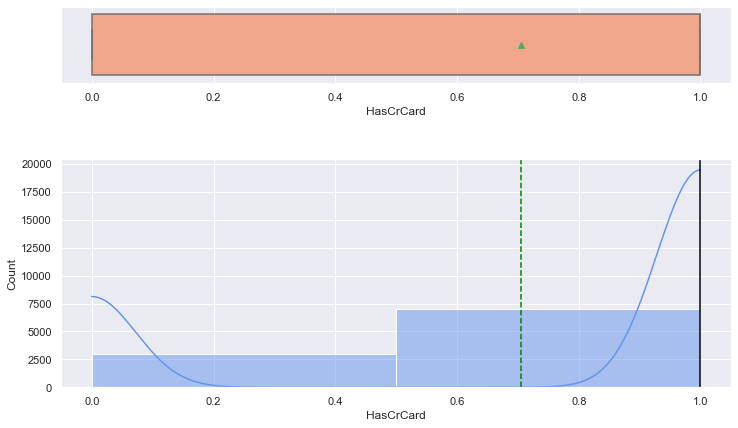

<IPython.core.display.Javascript object>

In [46]:
# Visualize data through plot
hist_boxplot(churn_data, "HasCrCard", kde=True, bins=2)

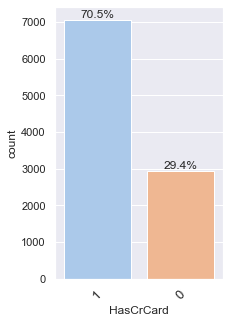

<IPython.core.display.Javascript object>

In [47]:
# Visualize data through plot
labeled_barplot(churn_data, "HasCrCard", perc=True)

#### Observation of  column "HasCrCard": 
1. This is a numerical variable. But, has discrete values.
2. There are only two values 0 and 1.
3. Most of the customers have Credit Card (70.5%).
4. There are no missing values

##### Univariate Analysis - Column "IsActiveMember"

In [48]:
# Basic summary
churn_data[["IsActiveMember"]].describe()

IsActiveMember
count    10000.000000
mean         0.515100
std          0.499797
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000

<IPython.core.display.Javascript object>

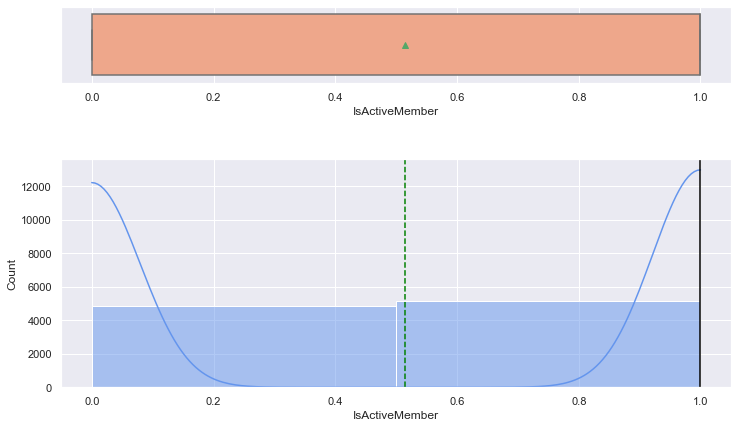

<IPython.core.display.Javascript object>

In [49]:
# Visualize data through plot
hist_boxplot(churn_data, "IsActiveMember", kde=True, bins=2)

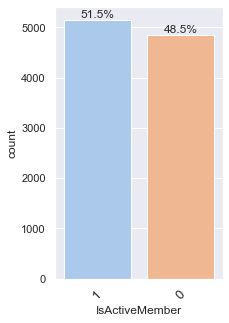

<IPython.core.display.Javascript object>

In [50]:
# Visualize data through plot
labeled_barplot(churn_data, "IsActiveMember", perc=True)

#### Observation of  column "IsActiveMember": 
1. This is a numerical variable. But, has discrete values.
2. There are only two values 1 and 0.
3. Most of the customers were active members (51.5%).
4. There are no missing values

##### Univariate Analysis - Column "EstimatedSalary"

In [51]:
# Basic summary
churn_data[["EstimatedSalary"]].describe()

EstimatedSalary
count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000

<IPython.core.display.Javascript object>

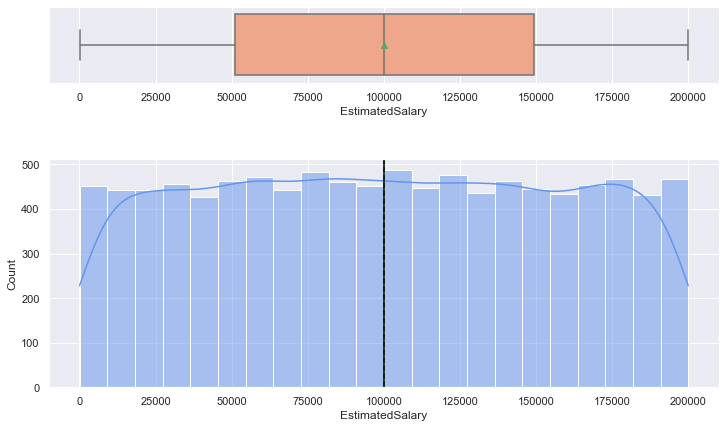

<IPython.core.display.Javascript object>

In [52]:
# Visualize data through plot
hist_boxplot(churn_data, "EstimatedSalary", kde=True)

#### Observation of  column "EstimatedSalary": 
1. It looks like a normal distribution.
2. It is not skewed.
3. It has no outliers. 
4. Mean and Median are almost same.
5. Mean is 100090 and median is 100093.
6. There are no missing values

In [53]:
# Create bins for Balance for ploting purpose
churn_data["EstimatedSalary_Bin"] = pd.cut(
    churn_data["EstimatedSalary"],
    [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000],
    labels=[
        "Less than 25000",
        "25001 to 50000",
        "50001 to 75000",
        "75001 to 100000",
        "100001 to 125000",
        "125001 to 150000",
        "150001 to 175000",
        "Above 175000",
    ],
)

<IPython.core.display.Javascript object>

In [54]:
# Basic summary
churn_data[["EstimatedSalary_Bin"]].describe()

EstimatedSalary_Bin
count                10000
unique                   8
top       125001 to 150000
freq                  1279

<IPython.core.display.Javascript object>

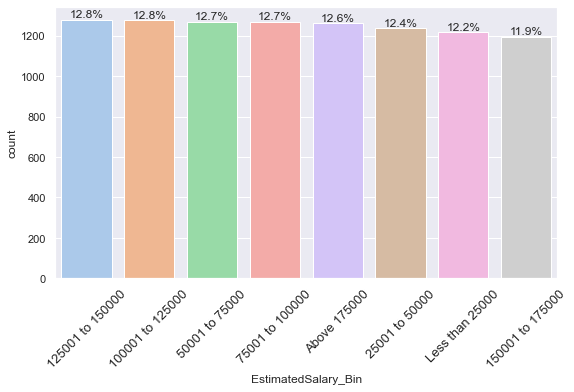

<IPython.core.display.Javascript object>

In [55]:
# Visualize data through plot
labeled_barplot(churn_data, "EstimatedSalary_Bin", perc=True)

#### Observation of  column "EstimatedSalary_Bin": 
1. All the bins has almost equal number of customers.

##### Univariate Analysis - Column "Exited"

In [56]:
# Basic summary
churn_data[["Exited"]].describe()

Exited
count  10000.000000
mean       0.203700
std        0.402769
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

<IPython.core.display.Javascript object>

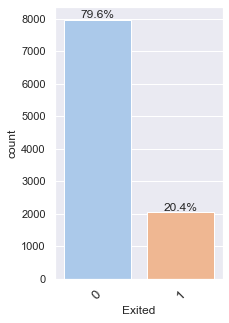

<IPython.core.display.Javascript object>

In [57]:
# Visualize data through plot
labeled_barplot(churn_data, "Exited", perc=True)

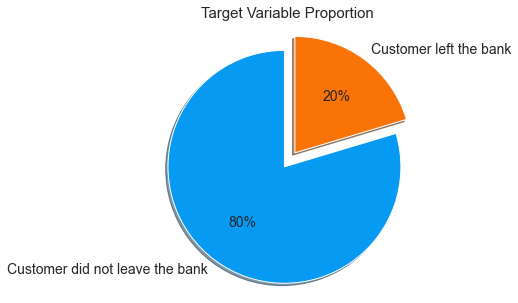

<IPython.core.display.Javascript object>

In [58]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Customer did not leave the bank", "Customer left the bank"
sizes = [
    churn_data.Exited[churn_data["Exited"] == 0].count(),
    churn_data.Exited[churn_data["Exited"] == 1].count(),
]
explode = (0, 0.15)

fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%0.0f%%",
    shadow=True,
    startangle=90,
    # radius=5,
    textprops={"fontsize": 14},
    colors=["#069AF3", "#F97306"],
)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Target Variable Proportion", size=15)
plt.show()

#### Observation of  column "Exited": 
1. This is a numerical variable. But, has discrete values.
2. There are only two values 1 and 0.
3. Most of the customers did not leave bank within six months (80%).
4. There are no missing values.
5. **This is the target variable and its imbalanced.** Need to try **Class Weight** or **Oversampling Techniques** in model building.

#### B. Bivariate & Multivariate Analysis <a id='B. Bivariate & Multivariate Analysis'></a>

In [59]:
# Get correlation between each numerical feature
churn_data.corr()

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

<IPython.core.display.Javascript object>

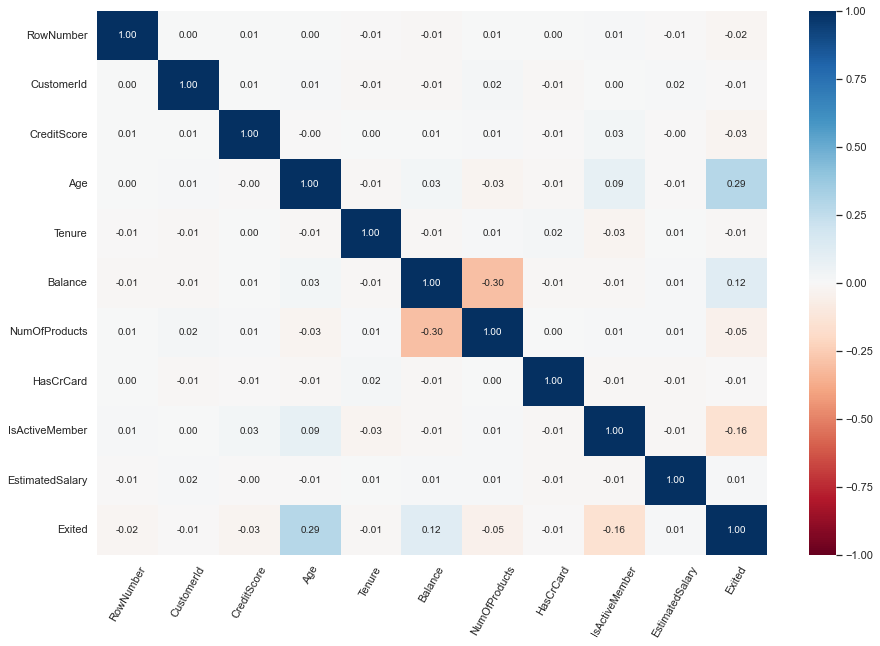

<IPython.core.display.Javascript object>

In [60]:
# Check heatmap for correlation
plt.figure(figsize=(15, 10))
sns.heatmap(
    churn_data.corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="RdBu",
    linewidths=0.002,
    linecolor="black",
)
plt.xticks(rotation=60)
plt.show()

#### Observation  on correlation between multiple variables:

1. There are positive correlation between below features:

    a) Age and Exited (target variable)
    
    b) Balance and Exited (target variable)
    
    
2. There are negative correlation between below features:

    a) Balance and Number of Products



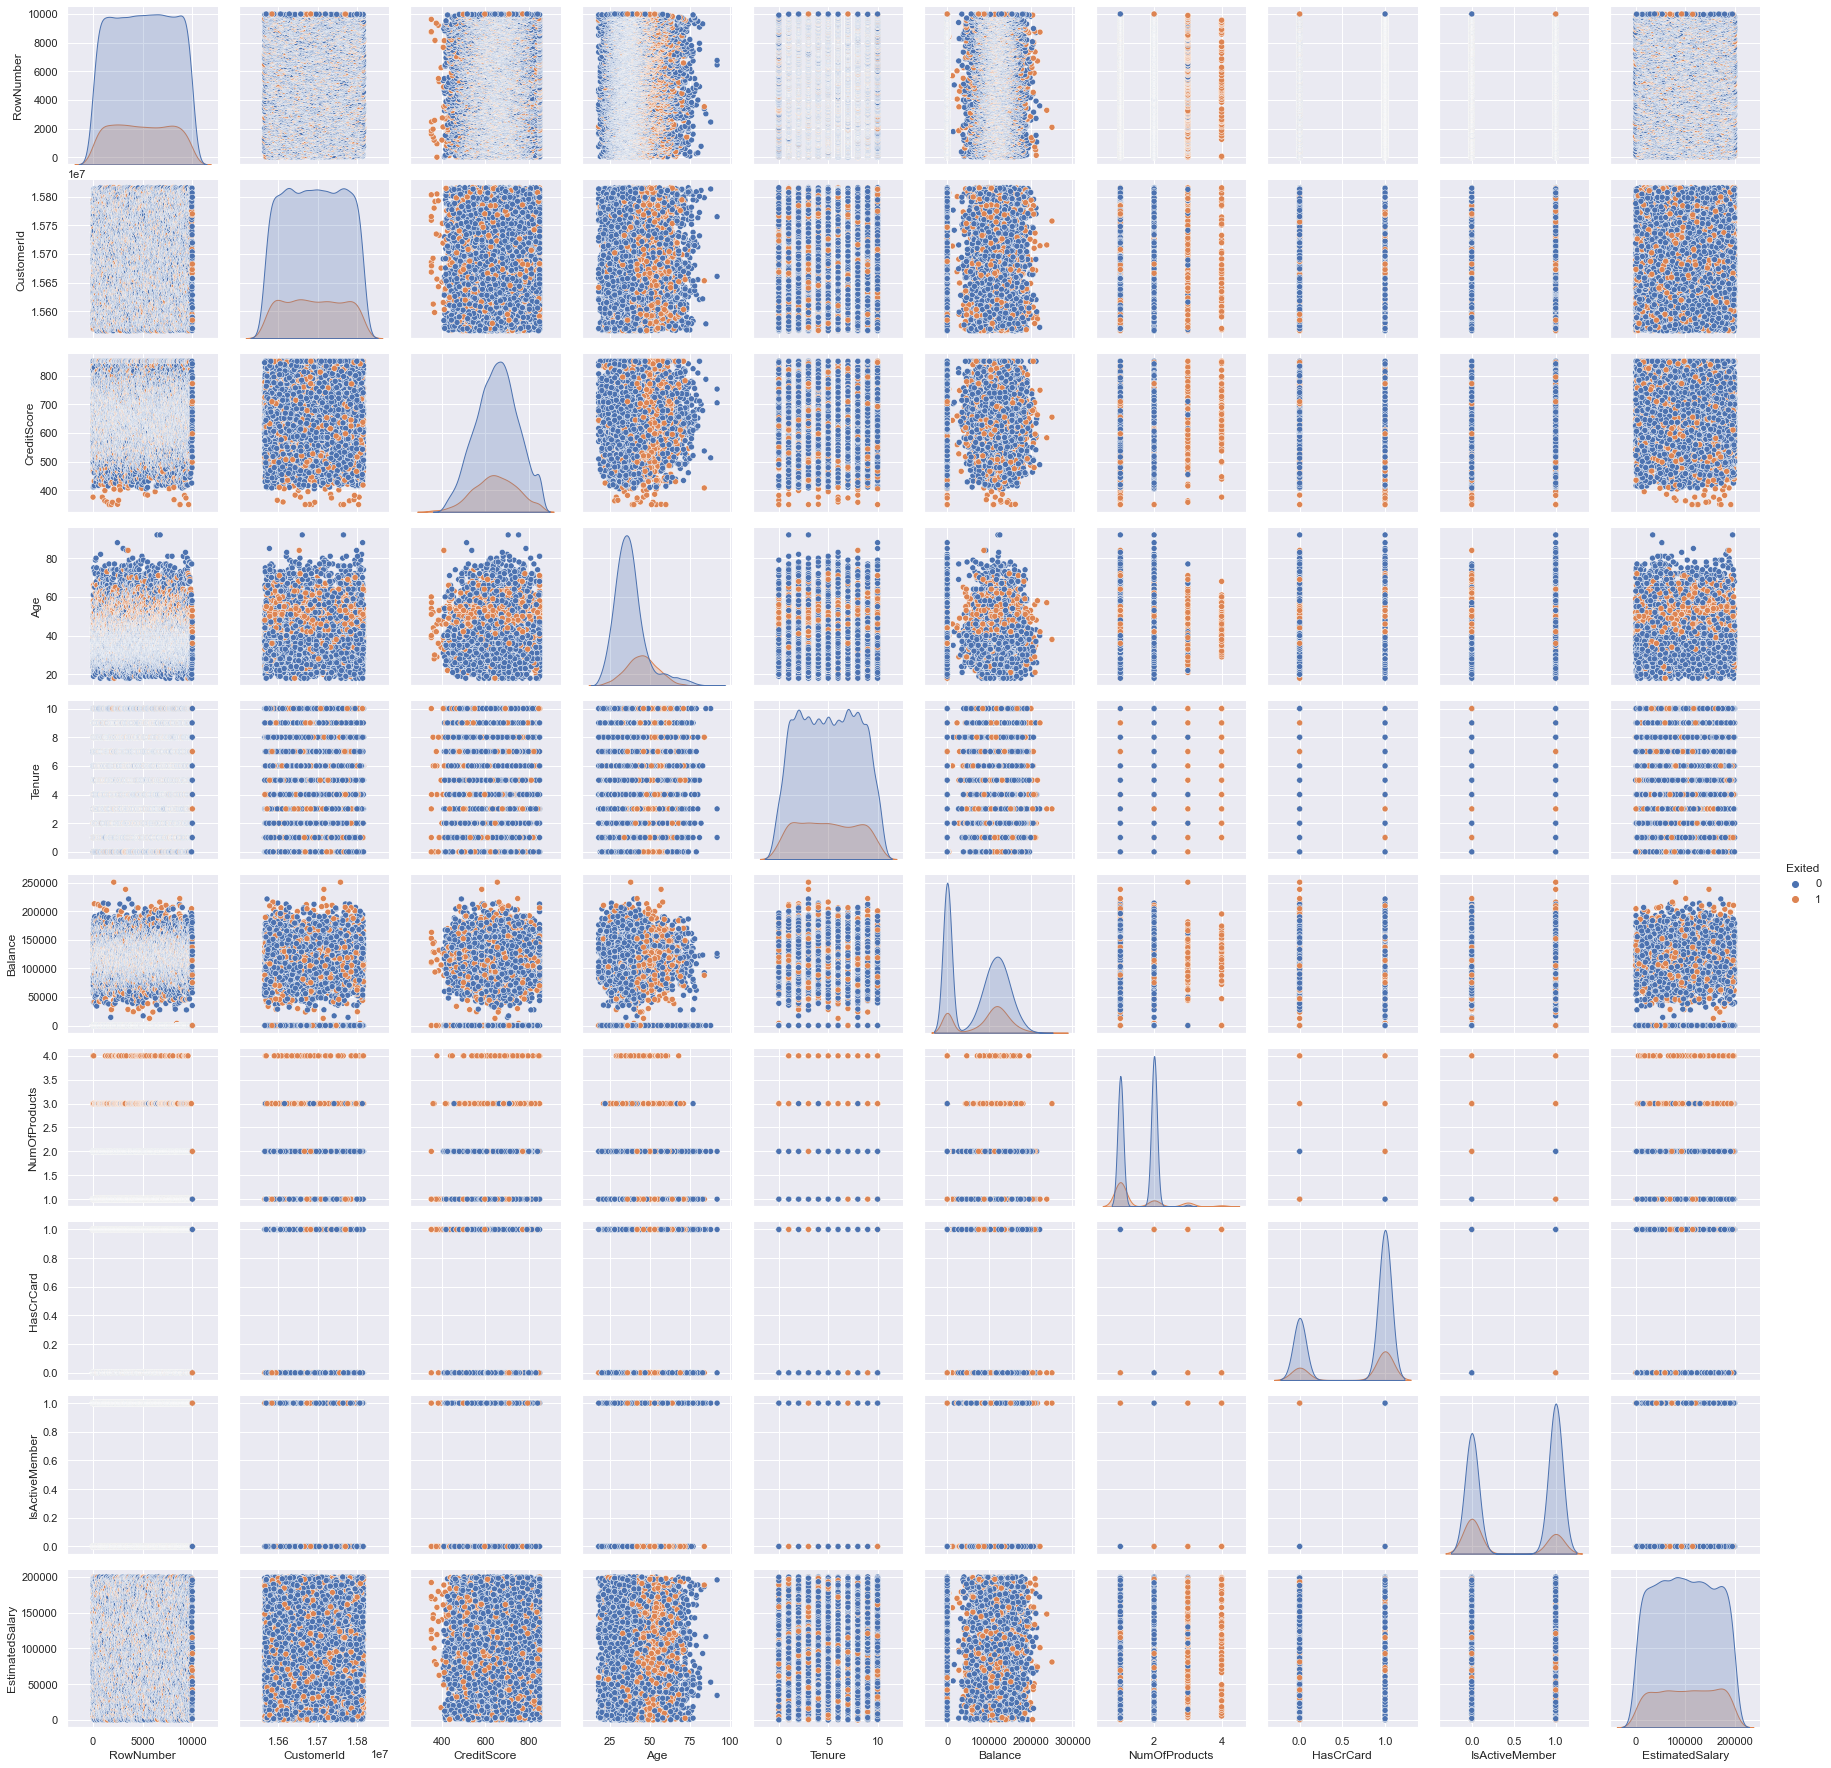

<IPython.core.display.Javascript object>

In [61]:
# Compare each numerical continous feature against each other
sns.pairplot(churn_data, hue="Exited")

In [62]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    display(pd.DataFrame(tab1))
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(
        kind="bar",
        stacked=True,
        figsize=(count + 5, 4),
        color=["cornflowerblue", "sandybrown"],
        # color=["sandybrown", "cornflowerblue"],
    )
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)
    plt.show()

<IPython.core.display.Javascript object>

In [63]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):
    """
    Print the histogram and box plots compared with respect to product taken or not

    data: dataframe
    predictor: independent variable
    target: target variable
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of predictor for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="limegreen",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of predictor for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="royalblue",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 0],
        palette=["cornflowerblue", "limegreen"],
    )

    # print("\n\n")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette=["royalblue", "forestgreen"],
    )

    plt.tight_layout(pad=1.08, h_pad=6, w_pad=2)
    plt.show()

<IPython.core.display.Javascript object>

In [64]:
# function to plot a boxplot and a histogram combined with hue and along the same scale.


def hist_boxplot_with_hue(data, column, hue_column, title_text, fig_size=(20, 8)):
    """
    Boxplot and histogram combined with hue

    data: dataframe
    feature: dataframe column
    fig_size: size of figure (default (12,9))
    hue_column: hue
    title_text: title
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=False,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=fig_size,
    )
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(data=data, x=column, ax=ax_box2, showmeans=True, color="lemonchiffon")
    sns.histplot(
        data=data,
        x=column,
        ax=ax_hist2,
        hue=hue_column,
        multiple="stack",
        palette="pastel",
    ).set(title=title_text)

    plt.show()

<IPython.core.display.Javascript object>

In [65]:
# Get column and its datatypes for bivariate analysis
churn_data.dtypes

RowNumber                 int64
CustomerId                int64
Surname                  object
CreditScore               int64
Geography                object
Gender                   object
Age                       int64
Tenure                    int64
Balance                 float64
NumOfProducts             int64
HasCrCard                 int64
IsActiveMember            int64
EstimatedSalary         float64
Exited                    int64
CreditScore_Bin        category
Age_Bin                category
Balance_Bin            category
EstimatedSalary_Bin    category
dtype: object

<IPython.core.display.Javascript object>

##### CreditScore vs Exited

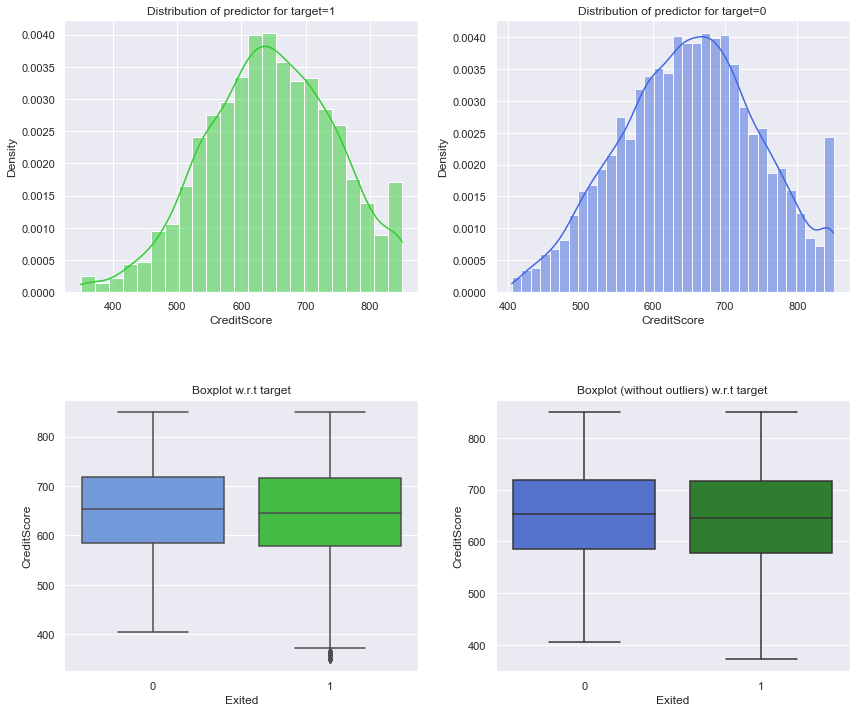

<IPython.core.display.Javascript object>

In [66]:
# Visualize data through plot
distribution_plot_wrt_target(data=churn_data, predictor="CreditScore", target="Exited")

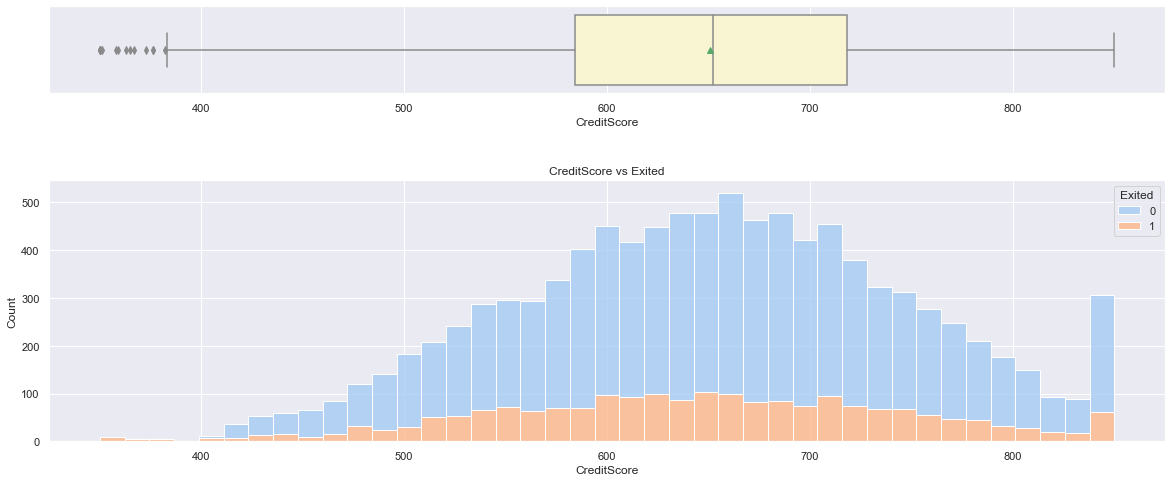

<IPython.core.display.Javascript object>

In [67]:
# Visualize data through histogram and box plots for outliers and its impact
hist_boxplot_with_hue(
    churn_data, "CreditScore", "Exited", "CreditScore vs Exited",
)

Exited              0     1    All
CreditScore_Bin                   
All              7963  2037  10000
601 to 700       3065   753   3818
501 to 600       1910   513   2423
701 to 800       1979   492   2471
401 to 500        491   133    624
801 to 900        518   127    645
300 to 400          0    19     19

----------------------------------------------------------------------------------------------------


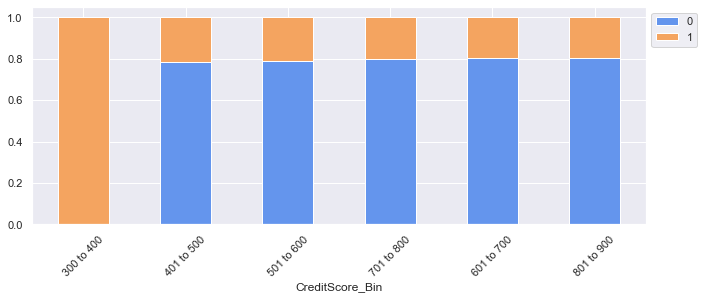

<IPython.core.display.Javascript object>

In [68]:
# Visualize data through plot
stacked_barplot(data=churn_data, predictor="CreditScore_Bin", target="Exited")

#### Observation  "Credit Score vs Exited": 

1. Credit Score has left skewed distribution for both Exited = 'False' and Exited = 'True' conditions.
2. Histogram shows number of customers who exited are uniformly distributed for credit score.
3. Box plots shows customers who exited and did not fall almost in same credit score range.
4. There is no correlation between Credit Score and Exited. 
5. **However, all customers having credit score less than 400 had exited.**

##### Geography vs Exited

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477

----------------------------------------------------------------------------------------------------


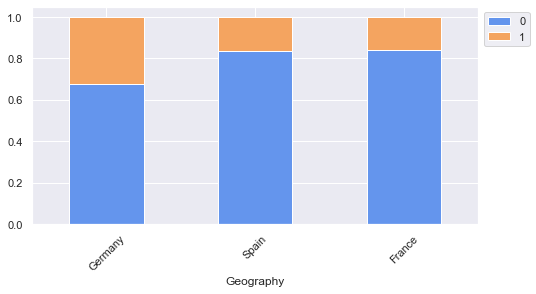

<IPython.core.display.Javascript object>

In [69]:
# Visualize data through plot
stacked_barplot(data=churn_data, predictor="Geography", target="Exited")

#### Observation  "Geography vs Exited": 

1. Customers in "Germany" had left bank within six months more than other geographical locations.
2. There is a slight correlation between Geography and Exited. 

##### Gender vs Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457

----------------------------------------------------------------------------------------------------


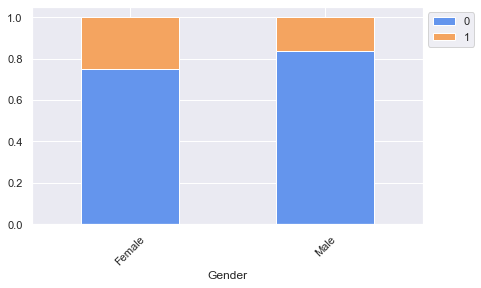

<IPython.core.display.Javascript object>

In [70]:
# Visualize data through plot
stacked_barplot(data=churn_data, predictor="Gender", target="Exited")

#### Observation  "Gender vs Exited": 

1. Female customers had left bank within six months more than male customers.
2. There is no high correlation between Gender and Exited. 

##### Age vs Exited

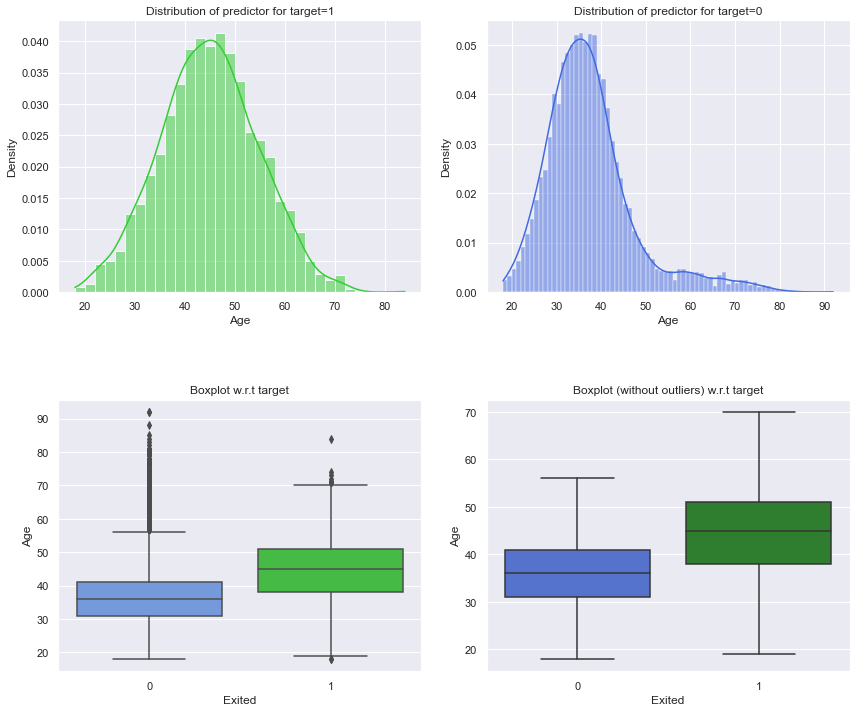

<IPython.core.display.Javascript object>

In [71]:
# Visualize data through plot
distribution_plot_wrt_target(data=churn_data, predictor="Age", target="Exited")

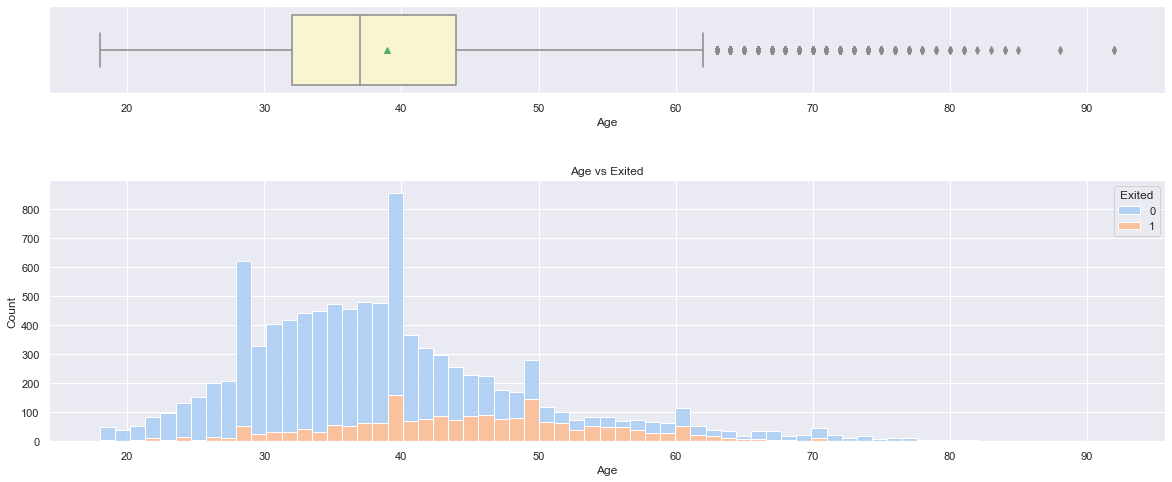

<IPython.core.display.Javascript object>

In [72]:
# Visualize data through histogram and box plots for outliers and its impact
hist_boxplot_with_hue(
    churn_data, "Age", "Exited", "Age vs Exited",
)

Exited           0     1    All
Age_Bin                        
All           7963  2037  10000
41 to 50      1532   788   2320
31 to 40      3913   538   4451
51 to 60       349   448    797
21 to 30      1736   143   1879
61 to 70       227   104    331
71 to 80       111    10    121
Less than 20    84     5     89
81 to 90         9     1     10
Above 90         2     0      2

----------------------------------------------------------------------------------------------------


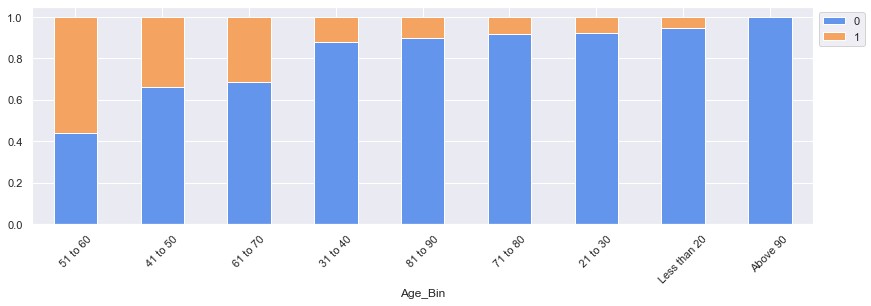

<IPython.core.display.Javascript object>

In [73]:
# Visualize data through plot
stacked_barplot(data=churn_data, predictor="Age_Bin", target="Exited")

#### Observation  "Age vs Exited": 

1. Age has normal distribution for Exited = 'True' and right skewed for Exited = 'False' conditions. This means customers who churned are evenly distributed. Whereas, customers who did not churn have younger age.
2. Histogram shows number of customers who churned are uniformly distributed towards higher age.
3. Box plots shows customers who churned and did not fall in different age range.
4. There is a slight correlation between Age and Exited. 
5. **Customers in age range from 41-50, 51-60 and 61-70 had churned more.**

##### Tenure vs Exited

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413

----------------------------------------------------------------------------------------------------


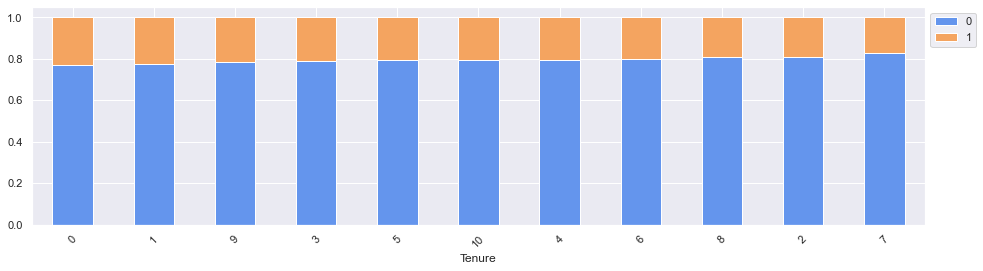

<IPython.core.display.Javascript object>

In [74]:
# Visualize data through plot
stacked_barplot(data=churn_data, predictor="Tenure", target="Exited")

#### Observation  "Tenure vs Exited": 

1. All tenure has almost equal distribution of churned and not churned customers.
2. There is no correlation between Tenure and Exited. 

##### Balance vs Exited

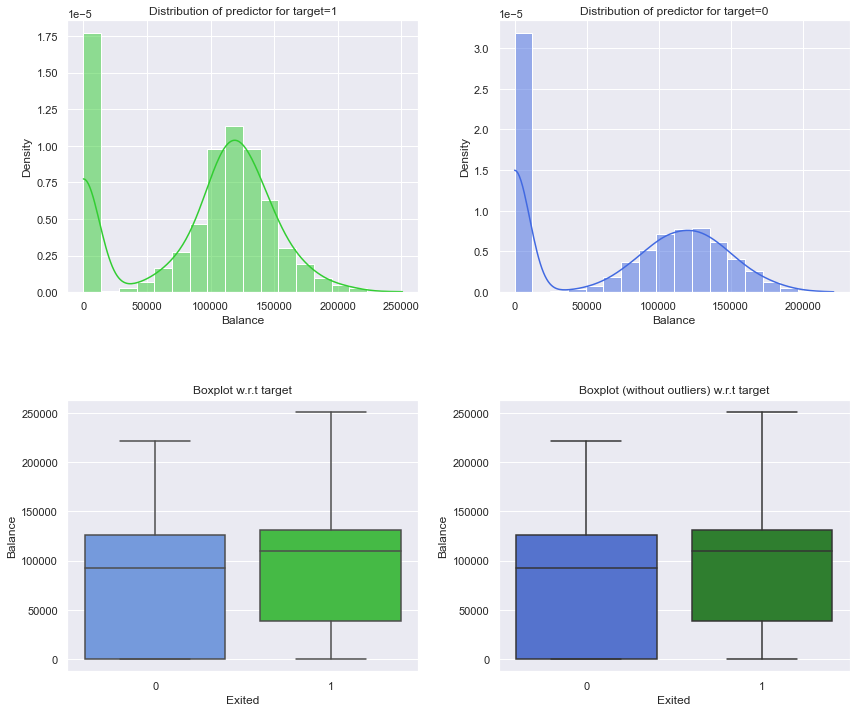

<IPython.core.display.Javascript object>

In [75]:
# Visualize data through plot
distribution_plot_wrt_target(data=churn_data, predictor="Balance", target="Exited")

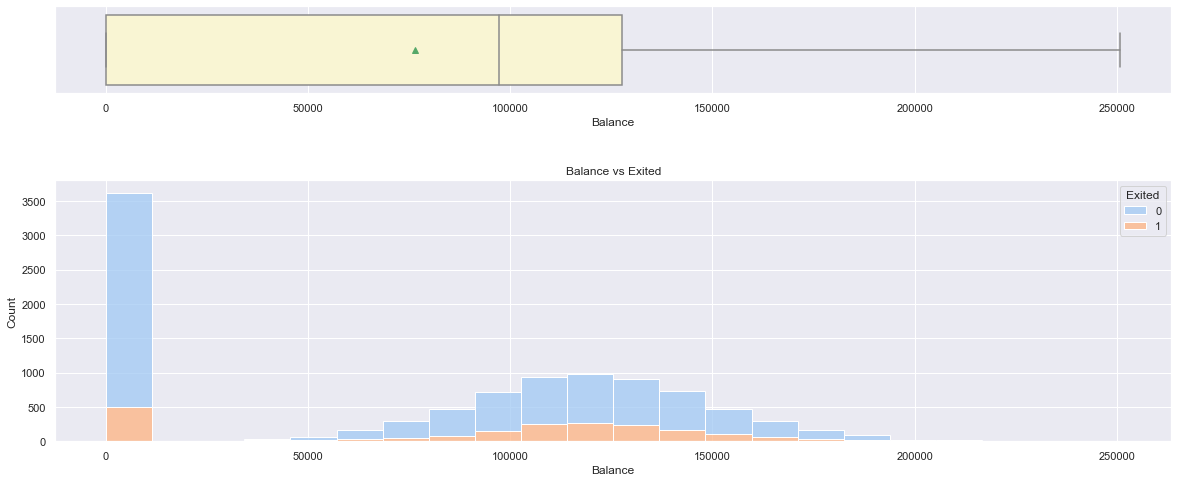

<IPython.core.display.Javascript object>

In [76]:
# Visualize data through histogram and box plots for outliers and its impact
hist_boxplot_with_hue(
    churn_data, "Balance", "Exited", "Balance vs Exited",
)

Exited               0     1    All
Balance_Bin                        
All               7963  2037  10000
100001 to 150000  2843   987   3830
Zeroes            3117   500   3617
50001 to 100000   1209   300   1509
150001 to 200000   730   205    935
1 to 50000          49    26     75
200001 to 250000    15    18     33
Above 250000         0     1      1

----------------------------------------------------------------------------------------------------


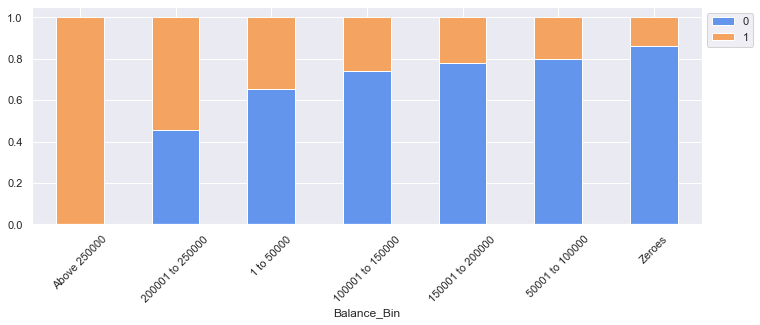

<IPython.core.display.Javascript object>

In [77]:
# Visualize data through plot
stacked_barplot(data=churn_data, predictor="Balance_Bin", target="Exited")

#### Observation  "Balance vs Exited": 

1. Customer balance has similar distribution for both Exited = 'False' and Exited = 'True' conditions.
2. Histogram shows number of customers who churned are uniformly distributed for balance.
3. Box plots shows customers who churned and existing fall almost in same balance range. 
4. There is a slight correlation between Balance and Exited. 
5. **Customers with balance more than 200001 had curned more.**

##### NumOfProducts vs Exited

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60

----------------------------------------------------------------------------------------------------


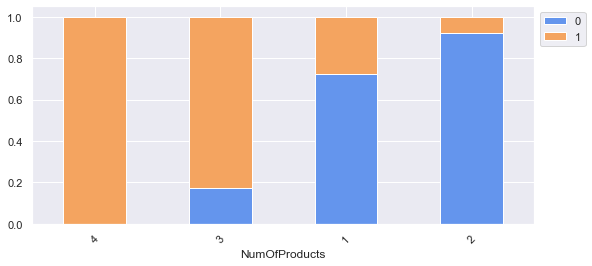

<IPython.core.display.Javascript object>

In [78]:
# Visualize data through plot
stacked_barplot(data=churn_data, predictor="NumOfProducts", target="Exited")

#### Observation  "NumOfProducts vs Exited": 

1. **Customers with 4 products had churned completely.**
2. **Customers with 3 products had churned mostly.**
3. There is a good correlation between NumOfProducts and Exited. 

##### HasCrCard vs Exited

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945

----------------------------------------------------------------------------------------------------


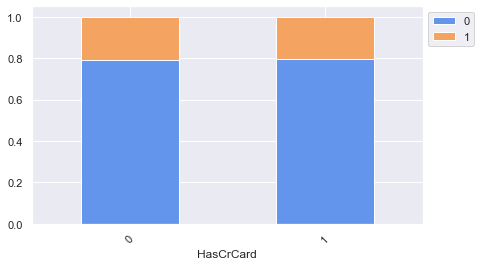

<IPython.core.display.Javascript object>

In [79]:
# Visualize data through plot
stacked_barplot(data=churn_data, predictor="HasCrCard", target="Exited")

#### Observation  "HasCrCard vs Exited": 

1. Customers who churned and did not are equally distributed. 
2. There is no correlation between HasCrCard and Exited. 

##### IsActiveMember vs Exited

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151

----------------------------------------------------------------------------------------------------


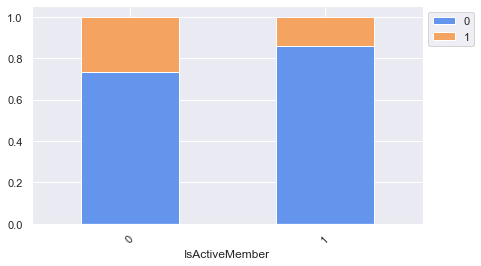

<IPython.core.display.Javascript object>

In [80]:
# Visualize data through plot
stacked_barplot(data=churn_data, predictor="IsActiveMember", target="Exited")

#### Observation  "IsActiveMember vs Exited": 

1. Customers who are not active member had churned more.
2. There is a slight correlation between IsActiveMember and Exited. 

##### EstimatedSalary vs Exited

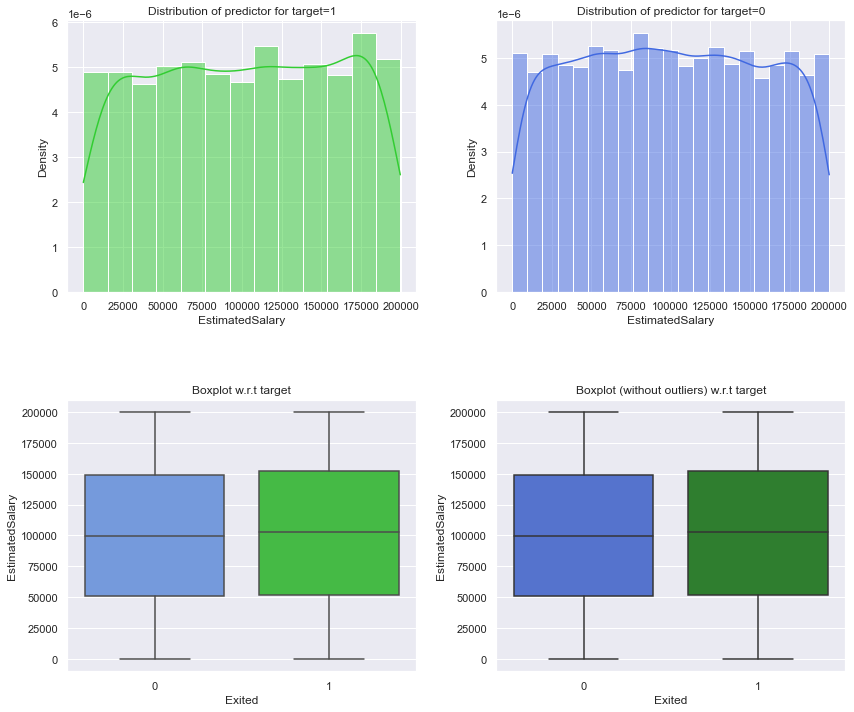

<IPython.core.display.Javascript object>

In [81]:
# Visualize data through plot
distribution_plot_wrt_target(
    data=churn_data, predictor="EstimatedSalary", target="Exited"
)

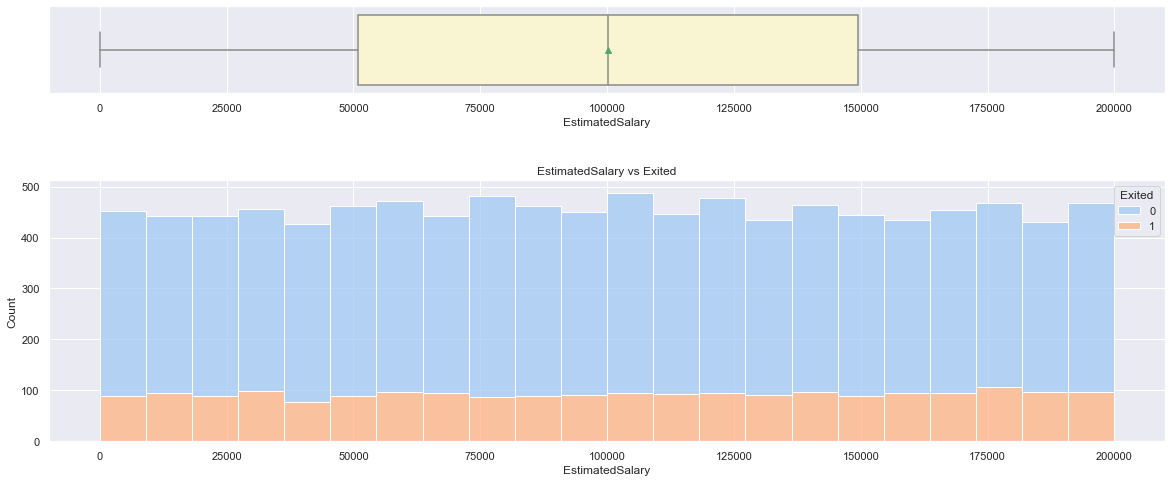

<IPython.core.display.Javascript object>

In [82]:
# Visualize data through histogram and box plots for outliers and its impact
hist_boxplot_with_hue(
    churn_data, "EstimatedSalary", "Exited", "EstimatedSalary vs Exited",
)

Exited                  0     1    All
EstimatedSalary_Bin                   
All                  7963  2037  10000
Above 175000          987   273   1260
50001 to 75000       1003   266   1269
125001 to 150000     1018   261   1279
100001 to 125000     1020   256   1276
150001 to 175000      941   254   1195
25001 to 50000        989   247   1236
Less than 25000       975   242   1217
75001 to 100000      1030   238   1268

----------------------------------------------------------------------------------------------------


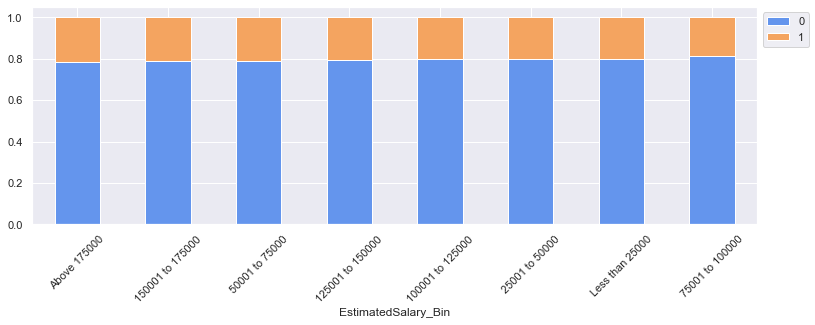

<IPython.core.display.Javascript object>

In [83]:
# Visualize data through plot
stacked_barplot(data=churn_data, predictor="EstimatedSalary_Bin", target="Exited")

#### Observation  "EstimatedSalary vs Exited": 

1. There is no correlations between EstimatedSalary and Exited.
2. There is not much noticeable difference between Exited = "True" and Exited = "False" conditions.

##### Balance vs NumOfProducts vs Exited

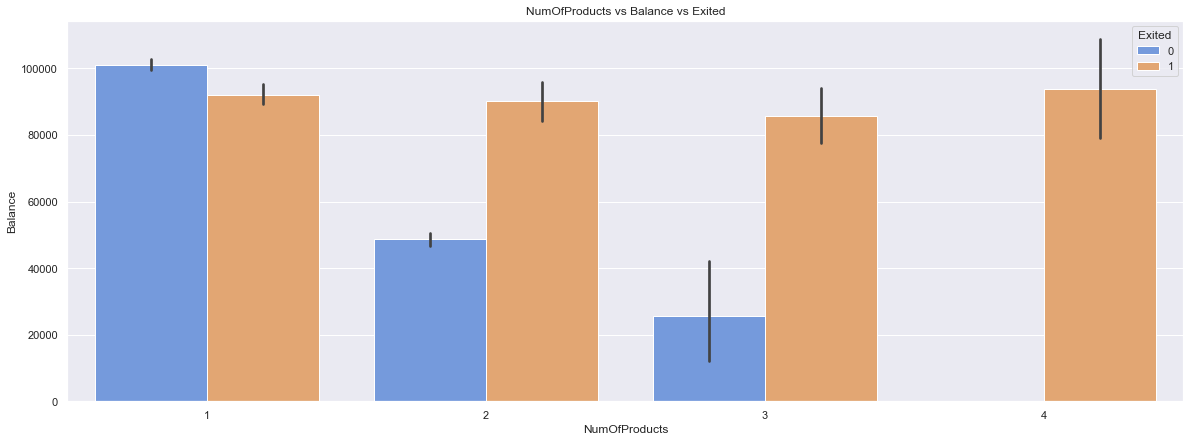

<IPython.core.display.Javascript object>

In [84]:
# Plot "NumOfProducts vs Balance vs Exited" comparison
plt.figure(figsize=(20, 7))
sns.barplot(
    data=churn_data,
    x="NumOfProducts",
    y="Balance",
    hue="Exited",
    palette=["cornflowerblue", "sandybrown"],
    # dodge=False,
).set(title="NumOfProducts vs Balance vs Exited")
plt.show()

#### Observation  "NumOfProducts vs Balance vs Exited": 

1. **Customers with 4 products had left bank completely.**
2. Customers with products 2 and 3 tends to leave bank.
3. Customers with only one product tends to stay with bank.

### 5. Insights Based On EDA<a id='5. Insights Based On EDA'></a>

### Data Description:

1. Row index is from 0 to 9999. Total rows are 10000
2. Column index is from 0 to 13. Total columns are 14
3. There are no null values in columns
4. Columns "CreditScore", "Age", "Balance" and "EstimatedSalary" are numerical and continous variables.
5. Columns "Tenure", "NumOfProducts", "HasCrCard" and "IsActiveMember" are numerical and discrete variables.
6. Columns "Geography" and "Gender" are categorical variables.
7. **Column "Exited" is the target variable.** It does not have null values. Value "0" is for "Customer did not leave bank within six months" and value "1" is for "Customer left bank within six months".

### Data Cleaning:

* Column "RowNumber" and "CustomerId" are unique and can be dropped.
* Column "Surname" is personal to each customer. It doesnt add value to model. So it can be dropped.

### Insights on each columns are listed below:


**1. CustomerId (Unique ID which is assigned to each customer) :** This feature is unique. So this must be dropped.

**2. Surname (Last name of the customer) :** This feature is unique to each customer. So this must be dropped.

**3. CreditScore (It defines the credit history of the customer) :** It looks like a normal distribution. It is slightly skewed. It has few outliers. But, they seems to be very close to lower whisker. So it can be legitimate values. Mean and Median are almost same. Mean is 650 and median is 652. There are no missing values. Most of the customers fall under CreditScore range 601-700. Second most of the customers fall under CreditScore range 701-800. Third most of the customers fall under CreditScore range 501-600.

**4. Geography (A customer’s location) :** This is a categorical variable. There are only three values "France", "Germany" and "Spain". Most of the customers were from "France" (50.1%). Followed by "Germany" (25.1%) and "Spain" (24.8%). There are no missing values. One Hot Encoding can be applied here.

**5. Gender (It defines the Gender of the customer) :** This is a categorical variable. There are only two values "Male" and "Female". Most of the customers were from "Male" (54.6%). Followed by "Female" (45.4%). There are no missing values. One Hot Encoding can be applied here.

**6. Age (Age of the customer) :** It looks like a normal distribution. It is right skewed. It has outliers. But, they seems to be very close to each other at upper whisker. So it can be legitimate values.Mean and Median are almost same. Mean is 39 and median is 37. There are no missing values. Most of the customers fall under age range 31-40. Second most of the customers fall under age range 41-50. Third most of the customers fall under age range 21-30.

**7. Tenure (Number of years for which the customer has been with the bank) :** This is a numerical variable. But, has discrete values. There are only 11 values from 0 to 10. Most of the customers were having tenure from 1 to 9 almost at same percentage. There are no missing values.

**8. NumOfProducts (It refers to the number of products that a customer has purchased through the bank) :** This is a numerical variable. But, has discrete values. There are only 4 values from 1 to 4. Most of the customers were having products 1 (50.8%). Followed by 2 (45.9%), 3 (2.7%) and 4 (0.6%). There are no missing values.

**9. Balance (Account balance) :** There are lot of zero values. Distribution looks like normal when only balances greater than zero is considered. It is not skewed when only balances greater than zero is considered. It has no outliers. But, they are lot of zero values. Mean and Median are almost same if zeroes are ignored. Otherwise, mean is 62,397 and median is 97,198. There are no missing values. Most of the customers fall under balance range 100001-150000. Second most of the customers fall under balance 0. Third most of the customers fall under balance range 50001-100000.

**10. HasCrCard (It is a categorical variable that decides whether the customer has a credit card or not) :** This is a numerical variable. But, has discrete values. There are only two values 0 and 1. Most of the customers have Credit Card (70.5%). There are no missing values.

**11. EstimatedSalary (Estimated salary) :** It looks like a normal distribution. It is not skewed. It has no outliers. Mean and Median are almost same. Mean is 100090 and median is 100093. There are no missing values. All the bins has almost equal number of customers.

**12. isActiveMember (It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )) :** This is a numerical variable. But, has discrete values. There are only two values 1 and 0. Most of the customers were active members (51.5%). There are no missing values.

**13. Excited (It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values) :** This is a numerical variable. But, has discrete values. There are only two values 1 and 0. Most of the customers did not leave bank within six months (80%). There are no missing values. This is the target variable and its imbalanced. Need to try Class Weight or Oversampling Techniques in model building.


### Key meaningful observations from Bivariate analysis:

**1. CreditScore vs Exited :** Credit Score has left skewed distribution for both Exited = 'False' and Exited = 'True' conditions. Histogram shows number of customers who exited are uniformly distributed for credit score. Box plots shows customers who exited and did not fall almost in same credit score range. There is no correlation between Credit Score and Exited. **However, all customers having credit score less than 400 had exited.**

**2. Geography vs Exited : Customers in "Germany" had left bank within six months more than other geographical locations.** There is a slight correlation between Geography and Exited.

**3. Gender vs Exited :** Female customers had left bank within six months more than male customers. There is no high correlation between Gender and Exited.

**4. Age vs Exited :** Age has normal distribution for Exited = 'True' and right skewed for Exited = 'False' conditions. This means customers who churned are evenly distributed. Whereas, customers who did not churn have younger age. Histogram shows number of customers who churned are uniformly distributed towards higher age.
Box plots shows customers who churned and did not fall in different age range. There is a slight correlation between Age and Exited. **Customers in age range from 41-50, 51-60 and 61-70 had churned more.**

**5. Tenure vs Exited :** All tenure has almost equal distribution of churned and not churned customers. There is no correlation between Tenure and Exited.

**6. Balance vs Exited :** Customer balance has similar distribution for both Exited = 'False' and Exited = 'True' conditions. Histogram shows number of customers who churned are uniformly distributed for balance. Box plots shows customers who churned and existing fall almost in same balance range. There is a slight correlation between Balance and Exited. **Customers with balance more than 200001 had churned more.**

**7. NumOfProducts vs Exited : Customers with 4 products had churned completely. Customers with 3 products had churned mostly.** There is a good correlation between NumOfProducts and Exited.

**8. HasCrCard vs Exited :** Customers who churned and did not are equally distributed. There is no correlation between HasCrCard and Exited.

**9. IsActiveMember vs Exited :** Customers who are not active member had churned more. There is a slight correlation between IsActiveMember and Exited.

**10. EstimatedSalary vs Exited :** There is no correlations between EstimatedSalary and Exited. There is not much noticeable difference between Exited = "True" and Exited = "False" conditions.

**11. Balance vs NumOfProducts vs Exited : Customers with 4 products had left bank completely. Customers with products 2 and 3 tends to leave bank.** Customers with only one product tends to stay with bank.



### 6. Data Preprocessing<a id='6. Data Preprocessing'></a>

#### A. Drop Columns<a id='A. Drop Columns'></a>

In [85]:
churn_data_EDA_Copy = churn_data.copy()

<IPython.core.display.Javascript object>

In [86]:
churn_data.dtypes

RowNumber                 int64
CustomerId                int64
Surname                  object
CreditScore               int64
Geography                object
Gender                   object
Age                       int64
Tenure                    int64
Balance                 float64
NumOfProducts             int64
HasCrCard                 int64
IsActiveMember            int64
EstimatedSalary         float64
Exited                    int64
CreditScore_Bin        category
Age_Bin                category
Balance_Bin            category
EstimatedSalary_Bin    category
dtype: object

<IPython.core.display.Javascript object>

In [87]:
# Drop columns as per findings in EDA. Like unique client number, Bin columns and original log and sqrt transformed columns etc
churn_data.drop(
    columns=[
        "RowNumber",
        "CustomerId",
        "Surname",
        "CreditScore_Bin",
        "Age_Bin",
        "Balance_Bin",
        "EstimatedSalary_Bin",
    ],
    axis=1,
    inplace=True,
)

<IPython.core.display.Javascript object>

#### B. Check Duplicates & Clean-up<a id='B. Check Duplicates & Clean-up'></a>

In [88]:
# Check for duplicate rows
churn_data[churn_data.duplicated()]

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

<IPython.core.display.Javascript object>

#### Observation : 
1. There are no duplicate values.

#### C. Feature Engineering<a id='C. Feature Engineering'></a>

In [89]:
# Check for unique values in every column to decide whether to convert column as "Category"
for colname in churn_data.columns:

    if churn_data[colname].nunique() <= 10:
        print("Column Name : ", colname)
        print("Column DataType : ", churn_data[colname].dtype)
        print("Number of unique values : ", churn_data[colname].nunique())
        print("Unique values are : ", churn_data[colname].unique())
        print("*" * 70)
        print("\n\n")

Column Name :  Geography
Column DataType :  object
Number of unique values :  3
Unique values are :  ['France' 'Spain' 'Germany']
**********************************************************************



Column Name :  Gender
Column DataType :  object
Number of unique values :  2
Unique values are :  ['Female' 'Male']
**********************************************************************



Column Name :  NumOfProducts
Column DataType :  int64
Number of unique values :  4
Unique values are :  [1 3 2 4]
**********************************************************************



Column Name :  HasCrCard
Column DataType :  int64
Number of unique values :  2
Unique values are :  [1 0]
**********************************************************************



Column Name :  IsActiveMember
Column DataType :  int64
Number of unique values :  2
Unique values are :  [1 0]
**********************************************************************



Column Name :  Exited
Column DataType :  int64
Number

<IPython.core.display.Javascript object>

#### Observation : 
1. Columns "Gender", "Education_Level", "Marital_Status" and "Card_Category" can be converted to category
2. One Hot Encoding can be applied to these categorical columns

In [90]:
# Convert columns as "category"
churn_data["Geography"] = churn_data["Geography"].astype("category")
churn_data["Gender"] = churn_data["Gender"].astype("category")

<IPython.core.display.Javascript object>

#### D. Check Outlier & Treatment<a id='D. Check Outlier & Treatment'></a>

In [91]:
# Create function to detect outliers


def detect_outliers_iqr(data):
    """
    To deteck outliers

    data: dataframe
    """

    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    print("1st Quantile : ", q1, " 3rd Quantile : ", q3, "\n")
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    print("Lower Whisker : ", lwr_bound, " Upper Whisker : ", upr_bound, "\n")
    for i in data:
        if i < lwr_bound or i > upr_bound:
            outliers.append(i)
    return outliers

<IPython.core.display.Javascript object>

In [92]:
# Get numerical data columns
numerical_col = churn_data.select_dtypes(include=np.number).columns.tolist()
numerical_col

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

<IPython.core.display.Javascript object>

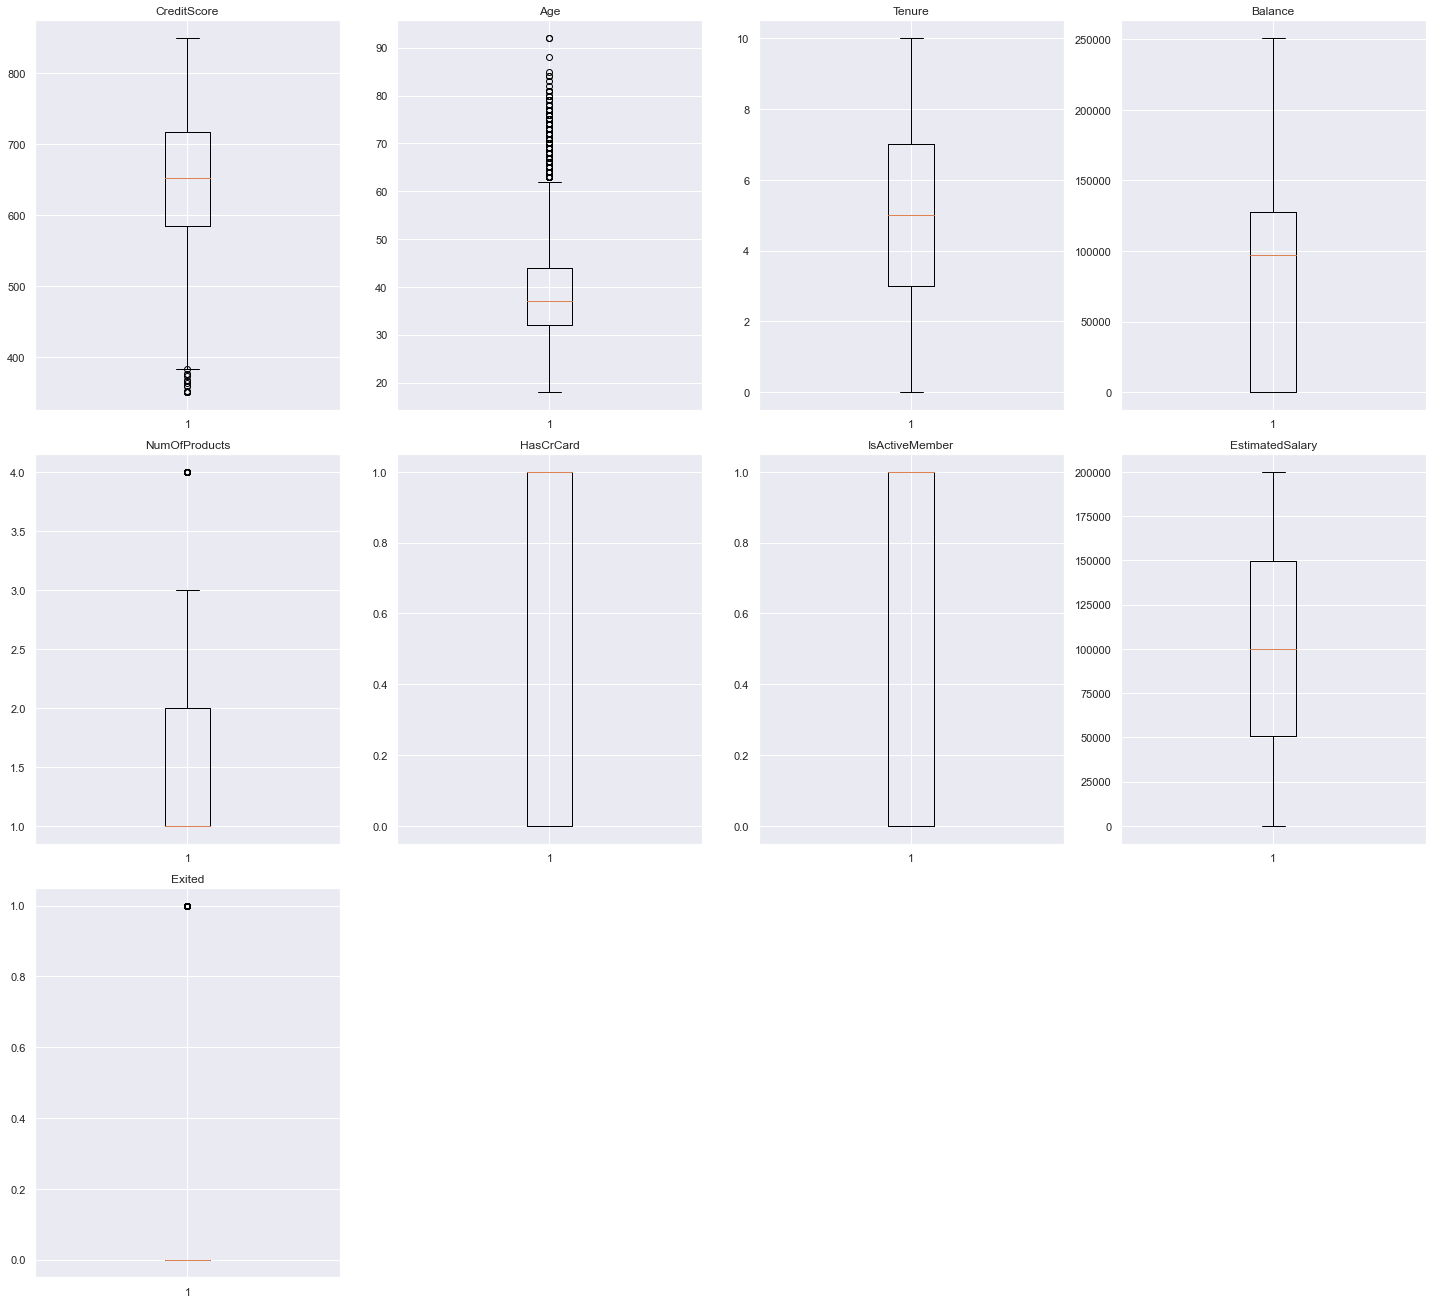

<IPython.core.display.Javascript object>

In [93]:
# Check outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(churn_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation: 

1. Outlier treatment is not required for these feature because those outlier values are very close to upper and lower whiskers and looks genuine and possible values. Those values are also tighlty close to each other and are not very far from each other.

#### E. Data Split - Training & Test<a id='E. Data Split - Training & Test'></a>

In [94]:
# Create X and Y data for independent and dependent variables respectively
X = churn_data.drop(["Exited",], axis=1,)

Y = churn_data["Exited"]

<IPython.core.display.Javascript object>

In [95]:
# Splitting data in temporary and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [96]:
# Splitting temporary data in train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

<IPython.core.display.Javascript object>

#### F. Check Data Split<a id='F. Check Data Split'></a>

In [97]:
# Check split of data

print(
    "{0:0.2f}% data is in Training set".format(
        (len(X_train) / len(churn_data.index)) * 100
    )
)
print(
    "{0:0.2f}% data is in Validation set".format(
        (len(X_val) / len(churn_data.index)) * 100
    )
)
print(
    "{0:0.2f}% data is in Test set".format((len(X_test) / len(churn_data.index)) * 100)
)

60.00% data is in Training set
20.00% data is in Validation set
20.00% data is in Test set


<IPython.core.display.Javascript object>

In [98]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in Training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in Validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in Test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (6000, 10)
Shape of Validation set :  (2000, 10)
Shape of Test set :  (2000, 10)
Percentage of classes in Training set:
0    0.796333
1    0.203667
Name: Exited, dtype: float64
Percentage of classes in Validation set:
0    0.796
1    0.204
Name: Exited, dtype: float64
Percentage of classes in Test set:
0    0.7965
1    0.2035
Name: Exited, dtype: float64


<IPython.core.display.Javascript object>

In [99]:
# Check ProdTaken True/False ratio in split data

print(
    "Original Attrition True Values    : {0} ({1:0.2f}%)".format(
        len(churn_data.loc[churn_data["Exited"] == 1]),
        (len(churn_data.loc[churn_data["Exited"] == 1]) / len(churn_data.index)) * 100,
    )
)
print(
    "Original Attrition False Values   : {0} ({1:0.2f}%)".format(
        len(churn_data.loc[churn_data["Exited"] == 0]),
        (len(churn_data.loc[churn_data["Exited"] == 0]) / len(churn_data.index)) * 100,
    )
)
print("")
print(
    "Training Attrition True Values    : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 1]),
        (len(y_train[y_train[:] == 1]) / len(y_train)) * 100,
    )
)
print(
    "Training Attrition False Values   : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 0]),
        (len(y_train[y_train[:] == 0]) / len(y_train)) * 100,
    )
)
print("")
print(
    "Validation Attrition True Values  : {0} ({1:0.2f}%)".format(
        len(y_val[y_val[:] == 1]), (len(y_val[y_val[:] == 1]) / len(y_val)) * 100
    )
)
print(
    "Validation Attrition False Values : {0} ({1:0.2f}%)".format(
        len(y_val[y_val[:] == 0]), (len(y_val[y_val[:] == 0]) / len(y_val)) * 100
    )
)
print("")
print(
    "Test Attrition True Values        : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100
    )
)
print(
    "Test Attrition False Values       : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100
    )
)
print("")

Original Attrition True Values    : 2037 (20.37%)
Original Attrition False Values   : 7963 (79.63%)

Training Attrition True Values    : 1222 (20.37%)
Training Attrition False Values   : 4778 (79.63%)

Validation Attrition True Values  : 408 (20.40%)
Validation Attrition False Values : 1592 (79.60%)

Test Attrition True Values        : 407 (20.35%)
Test Attrition False Values       : 1593 (79.65%)



<IPython.core.display.Javascript object>

#### G. Check Missing Value & Treatment<a id='G. Check Missing Value & Treatment'></a>

In [100]:
# Check null values and its percentage

def check_null_values(data):
    return pd.DataFrame(
    {
        "Null values": data.isnull().sum(),
        "Percentage of Null values": round(
            (data.isnull().sum() / data.shape[0] * 100), 2
        ),
        "Data Type": data.dtypes,
    }
    )
    
# Check null values in training set    
check_null_values(X_train)



Null values  Percentage of Null values Data Type
CreditScore                0                        0.0     int64
Geography                  0                        0.0  category
Gender                     0                        0.0  category
Age                        0                        0.0     int64
Tenure                     0                        0.0     int64
Balance                    0                        0.0   float64
NumOfProducts              0                        0.0     int64
HasCrCard                  0                        0.0     int64
IsActiveMember             0                        0.0     int64
EstimatedSalary            0                        0.0   float64

<IPython.core.display.Javascript object>

In [101]:
# Check null values in validation set
check_null_values(X_val)

Null values  Percentage of Null values Data Type
CreditScore                0                        0.0     int64
Geography                  0                        0.0  category
Gender                     0                        0.0  category
Age                        0                        0.0     int64
Tenure                     0                        0.0     int64
Balance                    0                        0.0   float64
NumOfProducts              0                        0.0     int64
HasCrCard                  0                        0.0     int64
IsActiveMember             0                        0.0     int64
EstimatedSalary            0                        0.0   float64

<IPython.core.display.Javascript object>

In [102]:
# Check null values in testing set
check_null_values(X_test)

Null values  Percentage of Null values Data Type
CreditScore                0                        0.0     int64
Geography                  0                        0.0  category
Gender                     0                        0.0  category
Age                        0                        0.0     int64
Tenure                     0                        0.0     int64
Balance                    0                        0.0   float64
NumOfProducts              0                        0.0     int64
HasCrCard                  0                        0.0     int64
IsActiveMember             0                        0.0     int64
EstimatedSalary            0                        0.0   float64

<IPython.core.display.Javascript object>

#### Observation : 
1. There are no null values

#### H. One Hot Encoding<a id='H. One Hot Encoding'></a>

In [103]:
# Get list of categorical features
categorical_features = list(X.select_dtypes(include="category").columns)
# Instantiate OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

<IPython.core.display.Javascript object>

#### I. Scale Data<a id='I. Scale Data'></a>

In [105]:
# Get list of numerical features
numeric_features = list(X.select_dtypes(include="number").columns)
# Instantiate StandardScaler
numeric_transformer = StandardScaler()
# numeric_transformer = RobustScaler()

<IPython.core.display.Javascript object>

#### J. Transform Data<a id='J. Transform Data'></a>

In [106]:
# Instantiate ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

<IPython.core.display.Javascript object>

In [107]:
# Apply fit and transform of ColumnTransformer
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

<IPython.core.display.Javascript object>

### 7. Model Building<a id='7. Model Building'></a>

#### Confusion Matrix

Confusion Matrix is performance measure of models

**True Positives (TP):** we correctly predicted that customers will churn, and they did.

**True Negatives (TN):** we correctly predicted that customers will not churn, and they did not.

**False Positives (FP):** we correctly predicted that customers will churn, but, they did not (a "Type I error").

**False Negatives (FN):** we correctly predicted that customers will not churn, but, they did (a "Type II error").

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will churn but in reality the customer would not churn. - Loss of resources for marketing/sales or contacting customers.

2. Predicting a customer will not churn but in reality the customer would have churn. - Loss of customer/revenue.

### Which case is more important? 

* Second case is important as given below:

* If we predict a customer will not churn but in reality the customer would churn, then company will loose customer and revenue.


### How to reduce this loss i.e need to reduce False Negatives?

*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

### Which loss function to be used?

*  `BinaryCrossentropy` should be used because target varible is categorical and has only two values - 0 and 1

In [108]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def make_confusion_matrix(model, predictors, target, text=None, threshold=0.5):
    """
    To plot the confusion_matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    pred = model.predict(predictors)

    pred = pd.Series(np.reshape(pred, -1))

    pred = pred.apply(lambda x: 1 if x > threshold else 0)

    cf_matrix = metrics.confusion_matrix(target, pred)

    group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

    group_percentages = [
        "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)
    ]

    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]

    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(8, 5))
    ax = sns.heatmap(
        cf_matrix,
        annot=labels,
        fmt="",
        cmap="Blues",
        linewidths=2,
        linecolor="black",
        # cbar=True,
    )

    ax.set_title("Confusion Matrix For " + text + " Data \n\n")
    ax.set_xlabel("\nPredicted Values")
    ax.set_ylabel("Actual Values ")

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(["Not Leaving Bank", "Leaving Bank"])
    ax.yaxis.set_ticklabels(["Not Leaving Bank", "Leaving Bank"])

    # plt.grid(b=None, axis="both", which="both", visible=True)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

<IPython.core.display.Javascript object>

In [109]:
def get_confusion_matrix(model, threshold=0.5, include_test=None):
    """
    To get confusion_matrix for both test and train

    model: classifier
    """
    make_confusion_matrix(model, X_train, y_train, "Training Set", threshold)
    print("\n")
    make_confusion_matrix(model, X_val, y_val, "Validation Set", threshold)
    if include_test != None:
        print("\n")
        make_confusion_matrix(model, X_test, y_test, "Testing Set", threshold)

<IPython.core.display.Javascript object>

In [110]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision, F1 and ROC-AUC Score
def get_metrics_score(model, flag=True, include_test=None, threshold=0.5):
    """
    model : classifier to predict values of X

    """

    # defining an empty list to store train and test results
    score_list = []

    # Predicting on train, validation and tests
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    pred_test = model.predict(X_test)

    pred_train = pd.Series(np.reshape(pred_train, -1))
    pred_train = pred_train.apply(lambda x: 1 if x > threshold else 0)

    pred_val = pd.Series(np.reshape(pred_val, -1))
    pred_val = pred_val.apply(lambda x: 1 if x > threshold else 0)

    pred_test = pd.Series(np.reshape(pred_test, -1))
    pred_test = pred_test.apply(lambda x: 1 if x > threshold else 0)

    # Accuracy of the model
    train_acc = metrics.accuracy_score(y_train, pred_train)
    val_acc = metrics.accuracy_score(y_val, pred_val)
    test_acc = metrics.accuracy_score(y_test, pred_test)

    # Recall of the model
    train_recall = metrics.recall_score(y_train, pred_train)
    val_recall = metrics.recall_score(y_val, pred_val)
    test_recall = metrics.recall_score(y_test, pred_test)

    # Precision of the model
    train_precision = metrics.precision_score(y_train, pred_train)
    val_precision = metrics.precision_score(y_val, pred_val)
    test_precision = metrics.precision_score(y_test, pred_test)

    # F1 Score of the model
    train_f1 = metrics.f1_score(y_train, pred_train)
    val_f1 = metrics.f1_score(y_val, pred_val)
    test_f1 = metrics.f1_score(y_test, pred_test)

    # ROC-AUC Score of the model
    train_roc_auc = metrics.roc_auc_score(y_train, pred_train)
    val_roc_auc = metrics.roc_auc_score(y_val, pred_val)
    test_roc_auc = metrics.roc_auc_score(y_test, pred_test)

    if include_test == None:
        score_list.extend(
            (
                train_acc,
                val_acc,
                train_recall,
                val_recall,
                train_precision,
                val_precision,
                train_f1,
                val_f1,
                train_roc_auc,
                val_roc_auc,
            )
        )

        # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
        if flag == True:

            display(
                pd.DataFrame(
                    {
                        # "Score": ["Accuracy", "Recall", "Precision", "F1","ROC-AUC"],
                        "Training Score": [
                            train_acc,
                            train_recall,
                            train_precision,
                            train_f1,
                            train_roc_auc,
                        ],
                        "Validation Score": [
                            val_acc,
                            val_recall,
                            val_precision,
                            val_f1,
                            val_roc_auc,
                        ],
                    },
                    index=["Accuracy", "Recall", "Precision", "F1", "ROC-AUC"],
                )
            )
    else:
        score_list.extend(
            (
                train_acc,
                val_acc,
                test_acc,
                train_recall,
                val_recall,
                test_recall,
                train_precision,
                val_precision,
                test_precision,
                train_f1,
                val_f1,
                test_f1,
                train_roc_auc,
                val_roc_auc,
                test_roc_auc,
            )
        )

        # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
        if flag == True:

            display(
                pd.DataFrame(
                    {
                        # "Score": ["Accuracy", "Recall", "Precision", "F1","ROC-AUC"],
                        "Training Score": [
                            train_acc,
                            train_recall,
                            train_precision,
                            train_f1,
                            train_roc_auc,
                        ],
                        "Validation Score": [
                            val_acc,
                            val_recall,
                            val_precision,
                            val_f1,
                            val_roc_auc,
                        ],
                        "Testing Score": [
                            test_acc,
                            test_recall,
                            test_precision,
                            test_f1,
                            test_roc_auc,
                        ],
                    },
                    index=["Accuracy", "Recall", "Precision", "F1", "ROC-AUC"],
                )
            )

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [111]:
def plot_roc_auc(model, predictors, target):
    # predict probabilities
    yhat1 = model.predict(predictors)
    # keep probabilities for the positive outcome only
    yhat1 = yhat1[:, 0]
    # calculate roc curves
    fpr, tpr, thresholds1 = metrics.roc_curve(target, yhat1)
    # calculate the g-mean for each threshold
    gmeans1 = np.sqrt(tpr * (1 - fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans1)
    print("Best Threshold=%f, G-Mean=%.3f" % (thresholds1[ix], gmeans1[ix]))
    # plot the roc curve for the model
    plt.figure(figsize=(8, 5))
    plt.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
    plt.plot(fpr, tpr, marker=".")
    plt.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")
    # axis labels
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    # show the plot
    plt.show()
    return (thresholds1[ix], gmeans1[ix])

<IPython.core.display.Javascript object>

#### Approach : 
Try different Keras optimizer techniques

- SGD
- RMSprop
- Adam

####  A. Model 1 

- SGD

In [112]:
# Initializing the ANN
model_1 = Sequential()
model_1.add(Dense(activation="relu", input_shape=(X_train.shape[1],), units=64))
model_1.add(Dense(64, activation="relu"))
model_1.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [113]:
# Create optimizer with default learning rate
# Compile the model
opt_1 = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)
model_1.compile(optimizer=opt_1, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()])
#model_1.compile(optimizer="SGD", loss="binary_crossentropy", metrics=['accuracy'])


<IPython.core.display.Javascript object>

In [114]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [115]:
history_1 = model_1.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    # batch_size=32,
    verbose=0,
    class_weight={0: 0.2, 1: 0.8},
)

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 1ms/step - loss: 0.4734 - recall: 0.7647


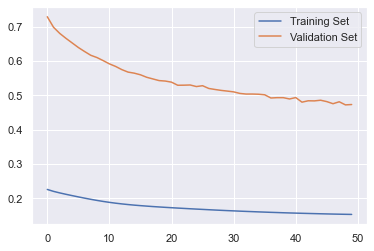

<IPython.core.display.Javascript object>

In [116]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_1.history)
hist["epoch"] = history_1.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("Training Set", "Validation Set"), loc=0)

# Printing results
results = model_1.evaluate(X_val, y_val)


Best Threshold=0.511456, G-Mean=0.778


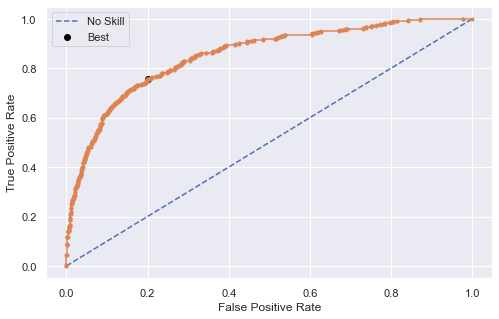

<IPython.core.display.Javascript object>

In [117]:
threshold_1, gmean_1 = plot_roc_auc(model_1, X_val, y_val)

In [118]:
# Accuracy as per the classification report
y_pred = model_1.predict(X_val)
y_pred = pd.Series(np.reshape(y_pred, -1))
y_pred = y_pred.apply(lambda x: 1 if x > threshold_1 else 0)
cr = metrics.classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1592
           1       0.49      0.75      0.59       408

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.80      2000



<IPython.core.display.Javascript object>

In [119]:
# Using function to get accuracy, recall, precision and F1 on train and validation set
model_1_score = get_metrics_score(model_1, threshold=threshold_1)

Training Score  Validation Score
Accuracy         0.780667          0.790000
Recall           0.759411          0.754902
Precision        0.475897          0.490446
F1               0.585120          0.594595
ROC-AUC          0.772757          0.776948

<IPython.core.display.Javascript object>

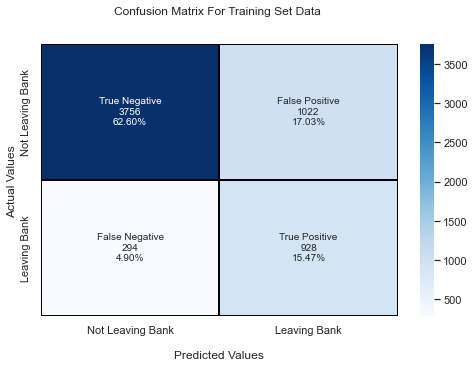

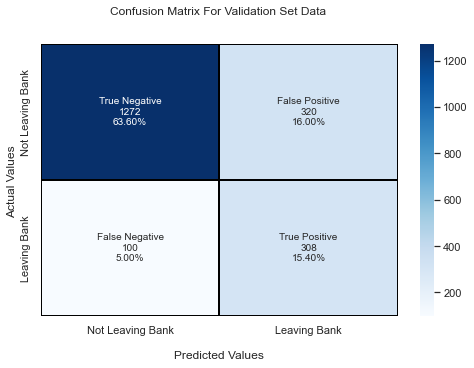

<IPython.core.display.Javascript object>

In [120]:
# Use function to get confusion matrix on test set
# make_confusion_matrix(model_1, X_test, y_test, "Test")
get_confusion_matrix(model_1, threshold=threshold_1)

####  B. Model 2 

- RMSprop

In [121]:
# Initializing the ANN
model_2 = Sequential()
model_2.add(Dense(activation="relu", input_shape=(X_train.shape[1],), units=64))
model_2.add(Dense(64, activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [122]:
# Create optimizer with default learning rate
# Compile the model
opt_2 = tf.keras.optimizers.RMSprop(learning_rate=1e-3)
model_2.compile(optimizer=opt_2, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()])
#model_1.compile(optimizer="SGD", loss="binary_crossentropy", metrics=['accuracy'])


<IPython.core.display.Javascript object>

In [123]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [124]:
history_2 = model_2.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    # batch_size=32,
    verbose=0,
    class_weight={0: 0.2, 1: 0.8},
)

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 827us/step - loss: 0.5207 - recall_1: 0.7157


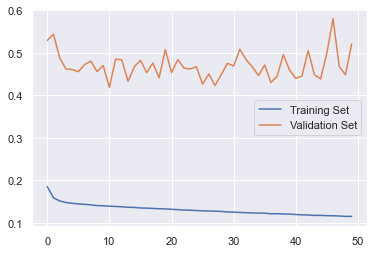

<IPython.core.display.Javascript object>

In [125]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_2.history)
hist["epoch"] = history_2.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("Training Set", "Validation Set"), loc=0)

# Printing results
results = model_2.evaluate(X_val, y_val)


Best Threshold=0.470337, G-Mean=0.757


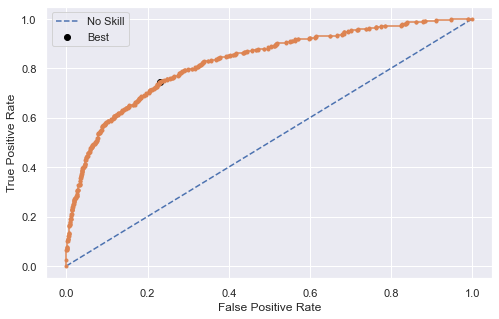

<IPython.core.display.Javascript object>

In [126]:
threshold_2, gmean_2 = plot_roc_auc(model_2, X_val, y_val)

In [127]:
# Accuracy as per the classification report
y_pred = model_2.predict(X_val)
y_pred = pd.Series(np.reshape(y_pred, -1))
y_pred = y_pred.apply(lambda x: 1 if x > threshold_2 else 0)
cr = metrics.classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1592
           1       0.45      0.74      0.56       408

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



<IPython.core.display.Javascript object>

In [128]:
# Using function to get accuracy, recall, precision and F1 on train and validation set
model_2_score = get_metrics_score(model_2, threshold=threshold_2)

Training Score  Validation Score
Accuracy         0.820500          0.764500
Recall           0.898527          0.742647
Precision        0.535349          0.452915
F1               0.670944          0.562674
ROC-AUC          0.849536          0.756374

<IPython.core.display.Javascript object>

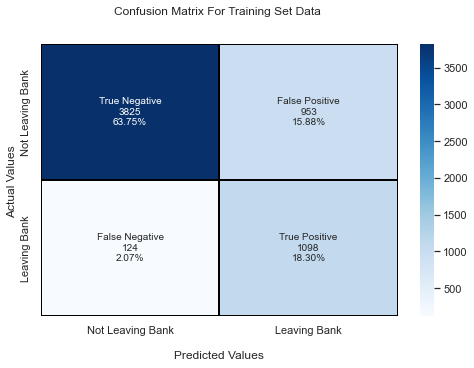

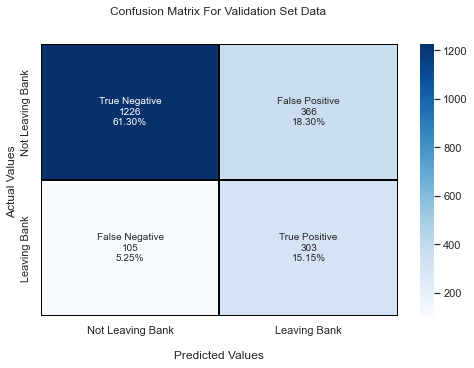

<IPython.core.display.Javascript object>

In [129]:
# Use function to get confusion matrix on test set
# make_confusion_matrix(model_1, X_test, y_test, "Test")
get_confusion_matrix(model_2, threshold=threshold_2)

####  C. Model 3 

- Adam

In [130]:
# Initializing the ANN
model_3 = Sequential()
model_3.add(Dense(activation="relu", input_shape=(X_train.shape[1],), units=64))
model_3.add(Dense(64, activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [131]:
# Create optimizer with default learning rate
# Compile the model
opt_3 = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_3.compile(optimizer=opt_3, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()])
#model_1.compile(optimizer="SGD", loss="binary_crossentropy", metrics=['accuracy'])


<IPython.core.display.Javascript object>

In [132]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [133]:
history_3 = model_3.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    # batch_size=32,
    verbose=0,
    class_weight={0: 0.2, 1: 0.8},
)

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 748us/step - loss: 0.5274 - recall_2: 0.7230


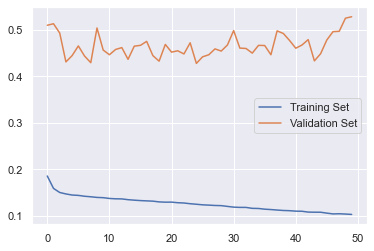

<IPython.core.display.Javascript object>

In [134]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_3.history)
hist["epoch"] = history_3.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("Training Set", "Validation Set"), loc=0)

# Printing results
results = model_3.evaluate(X_val, y_val)


Best Threshold=0.563153, G-Mean=0.747


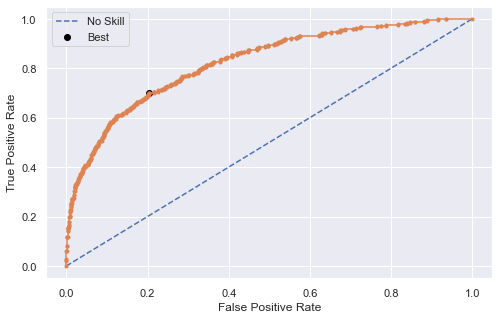

<IPython.core.display.Javascript object>

In [135]:
threshold_3, gmean_3 = plot_roc_auc(model_3, X_val, y_val)

In [136]:
# Accuracy as per the classification report
y_pred = model_3.predict(X_val)
y_pred = pd.Series(np.reshape(y_pred, -1))
y_pred = y_pred.apply(lambda x: 1 if x > threshold_3 else 0)
cr = metrics.classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1592
           1       0.47      0.70      0.56       408

    accuracy                           0.78      2000
   macro avg       0.69      0.75      0.70      2000
weighted avg       0.82      0.78      0.79      2000



<IPython.core.display.Javascript object>

In [137]:
# Using function to get accuracy, recall, precision and F1 on train and validation set
model_3_score = get_metrics_score(model_3, threshold=threshold_3)

Training Score  Validation Score
Accuracy         0.851833          0.776000
Recall           0.901800          0.698529
Precision        0.588990          0.467213
F1               0.712577          0.559921
ROC-AUC          0.870427          0.747192

<IPython.core.display.Javascript object>

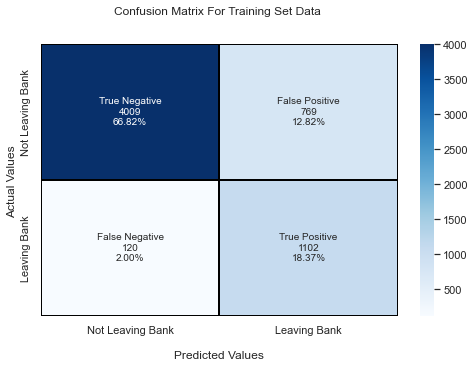

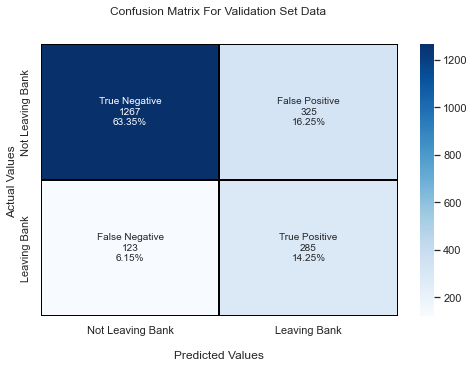

<IPython.core.display.Javascript object>

In [138]:
# Use function to get confusion matrix on test set
# make_confusion_matrix(model_1, X_test, y_test, "Test")
get_confusion_matrix(model_3, threshold=threshold_3)

In [139]:
def model_performance_comparison(model_list, model_name_list, include_test=None):

    # defining empty lists to add train and validation results
    acc_train = []
    acc_val = []
    acc_test = []
    recall_train = []
    recall_val = []
    recall_test = []
    precision_train = []
    precision_val = []
    precision_test = []
    f1_train = []
    f1_val = []
    f1_test = []
    roc_auc_train = []
    roc_auc_val = []
    roc_auc_test = []

    # looping through all the models to get the accuracy, precall, precision, f1 and ROC-AUC scores
    for model, i in model_list:
        j = get_metrics_score(model, False, include_test=True, threshold=i)
        acc_train.append(np.round(j[0], 2))
        acc_val.append(np.round(j[1], 2))
        acc_test.append(np.round(j[2], 2))
        recall_train.append(np.round(j[3], 2))
        recall_val.append(np.round(j[4], 2))
        recall_test.append(np.round(j[5], 2))
        precision_train.append(np.round(j[6], 2))
        precision_val.append(np.round(j[7], 2))
        precision_test.append(np.round(j[8], 2))
        f1_train.append(np.round(j[9], 2))
        f1_val.append(np.round(j[10], 2))
        f1_test.append(np.round(j[11], 2))
        roc_auc_train.append(np.round(j[12], 2))
        roc_auc_val.append(np.round(j[13], 2))
        roc_auc_test.append(np.round(j[14], 2))

    if include_test == None:
        display(
            pd.DataFrame(
                {
                    "Model": model_name_list,
                    "Train_Accuracy": acc_train,
                    "Validation_Accuracy": acc_val,
                    "Train_Recall": recall_train,
                    "Validation_Recall": recall_val,
                    "Train_Precision": precision_train,
                    "Validation_Precision": precision_val,
                    "Train_F1": f1_train,
                    "Validation_F1": f1_val,
                    "Train_ROC-AUC": roc_auc_train,
                    "Validation_ROC-AUC": roc_auc_test,
                }
            )
        )
    else:
        display(
            pd.DataFrame(
                {
                    "Model": model_name_list,
                    "Train_Accuracy": acc_train,
                    "Validation_Accuracy": acc_val,
                    "Testing_Accuracy": acc_test,
                    "Train_Recall": recall_train,
                    "Validation_Recall": recall_val,
                    "Testing_Recall": recall_test,
                    "Train_Precision": precision_train,
                    "Validation_Precision": precision_val,
                    "Testing_Precision": precision_test,
                    "Train_F1": f1_train,
                    "Validation_F1": f1_val,
                    "Testing_F1": f1_test,
                    "Train_ROC-AUC": roc_auc_train,
                    "Validation_ROC-AUC": roc_auc_test,
                },
                index=model_name_list,
            ).T
        )

<IPython.core.display.Javascript object>

In [140]:
model_performance_comparison(
    [(model_1, threshold_1), (model_2, threshold_2), (model_3, threshold_3)],
    [
        "Model 1 : SGD Optimizer",
        "Model 2 : RMSProp Optimizer",
        "Model 3 : Adam Optimizer",
    ],
)

Model  Train_Accuracy  Validation_Accuracy  \
0      Model 1 : SGD Optimizer            0.78                 0.79   
1  Model 2 : RMSProp Optimizer            0.82                 0.76   
2     Model 3 : Adam Optimizer            0.85                 0.78   

   Train_Recall  Validation_Recall  Train_Precision  Validation_Precision  \
0          0.76               0.75             0.48                  0.49   
1          0.90               0.74             0.54                  0.45   
2          0.90               0.70             0.59                  0.47   

   Train_F1  Validation_F1  Train_ROC-AUC  Validation_ROC-AUC  
0      0.59           0.59           0.77                0.75  
1      0.67           0.56           0.85                0.75  
2      0.71           0.56           0.87                0.74

<IPython.core.display.Javascript object>

#### Observation : 

Looks like Adam optimizer gives best training results compared to SGD and RMSprop. But, it's overfit. Try regularization techniques and more tuning to improve model performance.

Try further model building with different Keras weight initialization for Relu activation function

- HeNormal
- HeUniform

####  D. Model 4 

- Adam Optimizer 
- HeNormal Weight Initialization

In [141]:
# Initialize weight
initializer = tf.keras.initializers.HeNormal()
# Initializing the ANN
model_4 = Sequential()
model_4.add(
    Dense(
        activation="relu",
        kernel_initializer=initializer,
        input_shape=(X_train.shape[1],),
        units=64,
    )
)
model_4.add(Dense(64, activation="relu", kernel_initializer=initializer))
model_4.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [142]:
# Create optimizer with default learning rate
# Compile the model
opt_4 = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_4.compile(optimizer=opt_4, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()])


<IPython.core.display.Javascript object>

In [143]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [144]:
history_4 = model_4.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    # batch_size=32,
    verbose=0,
    class_weight={0: 0.2, 1: 0.8},
)

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 808us/step - loss: 0.5285 - recall_3: 0.6985


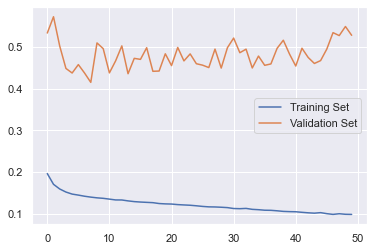

<IPython.core.display.Javascript object>

In [145]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_4.history)
hist["epoch"] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("Training Set", "Validation Set"), loc=0)

# Printing results
results = model_4.evaluate(X_val, y_val)


Best Threshold=0.567634, G-Mean=0.737


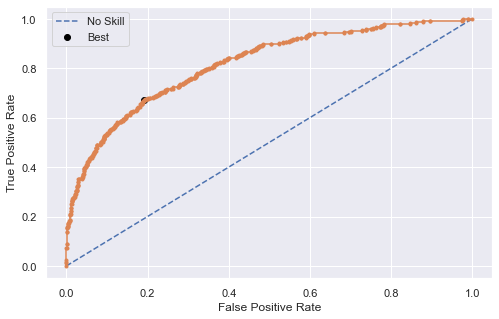

<IPython.core.display.Javascript object>

In [146]:
threshold_4, gmean_4 = plot_roc_auc(model_4, X_val, y_val)

In [147]:
# Accuracy as per the classification report
y_pred = model_4.predict(X_val)
y_pred = pd.Series(np.reshape(y_pred, -1))
y_pred = y_pred.apply(lambda x: 1 if x > threshold_4 else 0)
cr = metrics.classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.81      0.85      1592
           1       0.47      0.67      0.55       408

    accuracy                           0.78      2000
   macro avg       0.69      0.74      0.70      2000
weighted avg       0.82      0.78      0.79      2000



<IPython.core.display.Javascript object>

In [148]:
# Using function to get accuracy, recall, precision and F1 on train and validation set
model_4_score = get_metrics_score(model_4, threshold=threshold_4)

Training Score  Validation Score
Accuracy         0.876833          0.780000
Recall           0.906710          0.669118
Precision        0.639354          0.472318
F1               0.749915          0.553753
ROC-AUC          0.887951          0.738767

<IPython.core.display.Javascript object>

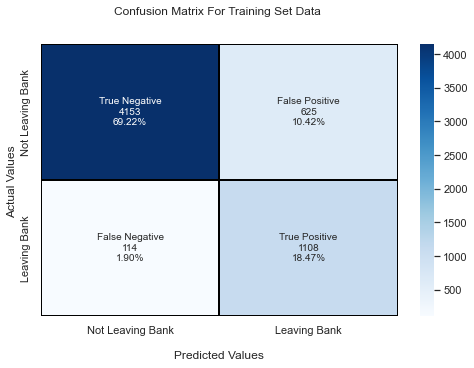

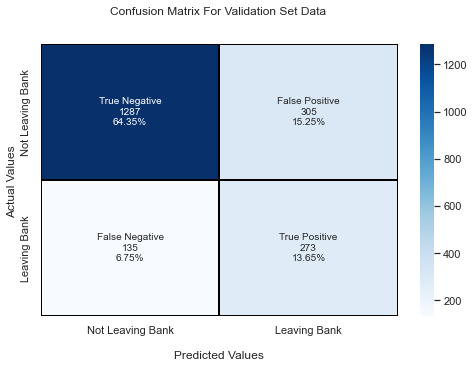

<IPython.core.display.Javascript object>

In [149]:
# Use function to get confusion matrix on test set
# make_confusion_matrix(model_1, X_test, y_test, "Test")
get_confusion_matrix(model_4, threshold=threshold_4)

####  E. Model 5 

- Adam Optimizer 
- HeUniform Weight Initialization

In [150]:
# Initialize weight
initializer = tf.keras.initializers.HeUniform()
# Initializing the ANN
model_5 = Sequential()
model_5.add(
    Dense(
        activation="relu",
        kernel_initializer=initializer,
        input_shape=(X_train.shape[1],),
        units=64,
    )
)
model_5.add(Dense(64, activation="relu", kernel_initializer=initializer))
model_5.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [151]:
# Create optimizer with default learning rate
# Compile the model
opt_5 = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_5.compile(optimizer=opt_5, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()])
#model_1.compile(optimizer="SGD", loss="binary_crossentropy", metrics=['accuracy'])


<IPython.core.display.Javascript object>

In [152]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                896       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [153]:
history_5 = model_5.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    # batch_size=32,
    verbose=0,
    class_weight={0: 0.2, 1: 0.8},
)

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 757us/step - loss: 0.5398 - recall_4: 0.7083


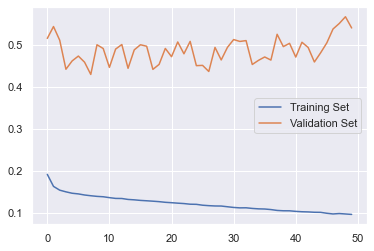

<IPython.core.display.Javascript object>

In [154]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_5.history)
hist["epoch"] = history_5.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("Training Set", "Validation Set"), loc=0)

# Printing results
results = model_5.evaluate(X_val, y_val)


Best Threshold=0.478581, G-Mean=0.748


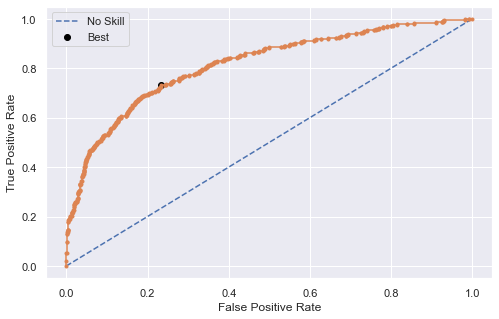

<IPython.core.display.Javascript object>

In [155]:
threshold_5, gmean_5 = plot_roc_auc(model_5, X_val, y_val)

In [156]:
# Accuracy as per the classification report
y_pred = model_5.predict(X_val)
y_pred = pd.Series(np.reshape(y_pred, -1))
y_pred = y_pred.apply(lambda x: 1 if x > threshold_5 else 0)
cr = metrics.classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.77      0.83      1592
           1       0.44      0.73      0.55       408

    accuracy                           0.76      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.82      0.76      0.78      2000



<IPython.core.display.Javascript object>

In [157]:
# Using function to get accuracy, recall, precision and F1 on train and validation set
model_5_score = get_metrics_score(model_5, threshold=threshold_5)

Training Score  Validation Score
Accuracy         0.839500          0.758000
Recall           0.949264          0.727941
Precision        0.562834          0.443284
F1               0.706671          0.551020
ROC-AUC          0.880345          0.746822

<IPython.core.display.Javascript object>

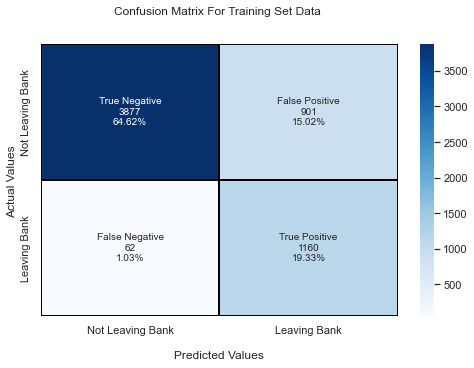

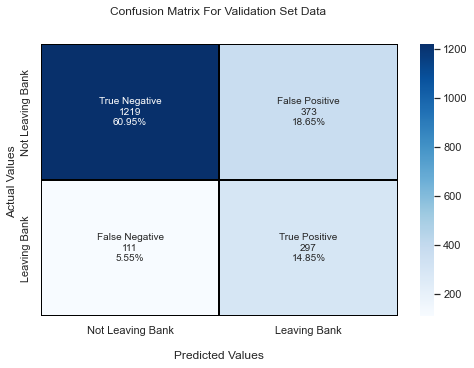

<IPython.core.display.Javascript object>

In [158]:
# Use function to get confusion matrix on test set
# make_confusion_matrix(model_1, X_test, y_test, "Test")
get_confusion_matrix(model_5, threshold=threshold_5)

In [159]:
model_performance_comparison(
    [(model_4, threshold_4), (model_5, threshold_5)],
    ["Model 4 : HeNormal", "Model 5 : HeUniform",],
)

Model  Train_Accuracy  Validation_Accuracy  Train_Recall  \
0   Model 4 : HeNormal            0.88                 0.78          0.91   
1  Model 5 : HeUniform            0.84                 0.76          0.95   

   Validation_Recall  Train_Precision  Validation_Precision  Train_F1  \
0               0.67             0.64                  0.47      0.75   
1               0.73             0.56                  0.44      0.71   

   Validation_F1  Train_ROC-AUC  Validation_ROC-AUC  
0           0.55           0.89                0.74  
1           0.55           0.88                0.74

<IPython.core.display.Javascript object>

#### Observation : 

Looks like HeUniform gives best results compared to HeNormal.

Try further model building with different regularization techniques

- Dropout
- L1 Regularization
- L2 Regularization

####  F. Model 6 

- Adam Optimizer 
- HeUniform Weight Initialization 
- Dropout

In [160]:
# Initialize weight
initializer = tf.keras.initializers.HeUniform()
# Initializing the ANN
model_6 = Sequential()
model_6.add(
    Dense(
        activation="relu",
        kernel_initializer=initializer,
        input_shape=(X_train.shape[1],),
        units=64,
    )
)
model_6.add(Dropout(0.2))
model_6.add(Dense(32, activation="relu", kernel_initializer=initializer))
model_6.add(Dropout(0.2))
model_6.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [161]:
# Create optimizer with default learning rate
# Compile the model
opt_6 = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_6.compile(optimizer=opt_6, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()])
#model_1.compile(optimizer="SGD", loss="binary_crossentropy", metrics=['accuracy'])


<IPython.core.display.Javascript object>

In [162]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [163]:
history_6 = model_6.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    # batch_size=32,
    verbose=0,
    class_weight={0: 0.2, 1: 0.8},
)

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 859us/step - loss: 0.4765 - recall_5: 0.7745


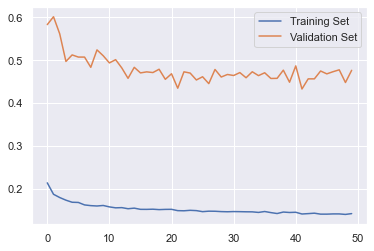

<IPython.core.display.Javascript object>

In [164]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_6.history)
hist["epoch"] = history_6.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("Training Set", "Validation Set"), loc=0)

# Printing results
results = model_6.evaluate(X_val, y_val)


Best Threshold=0.514934, G-Mean=0.787


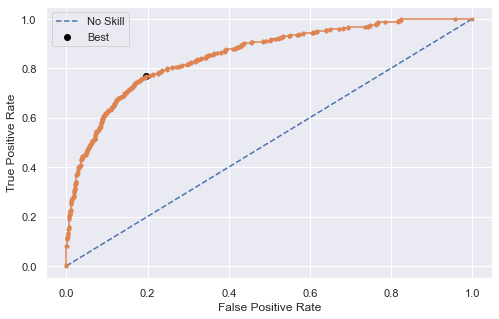

<IPython.core.display.Javascript object>

In [165]:
threshold_6, gmean_6 = plot_roc_auc(model_6, X_val, y_val)

In [166]:
# Accuracy as per the classification report
y_pred = model_6.predict(X_val)
y_pred = pd.Series(np.reshape(y_pred, -1))
y_pred = y_pred.apply(lambda x: 1 if x > threshold_6 else 0)
cr = metrics.classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1592
           1       0.50      0.77      0.61       408

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.73      2000
weighted avg       0.84      0.80      0.81      2000



<IPython.core.display.Javascript object>

In [167]:
# Using function to get accuracy, recall, precision and F1 on train and validation set
model_6_score = get_metrics_score(model_6, threshold=threshold_6)

Training Score  Validation Score
Accuracy         0.818333          0.797000
Recall           0.819967          0.767157
Precision        0.535256          0.501603
F1               0.647705          0.606589
ROC-AUC          0.818941          0.785903

<IPython.core.display.Javascript object>

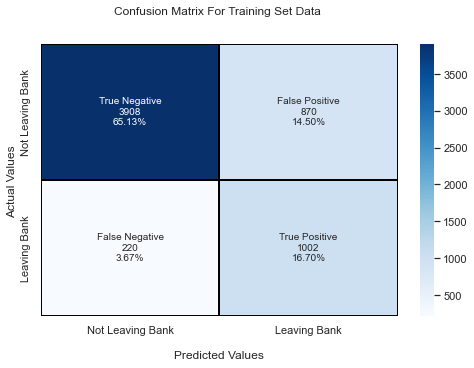

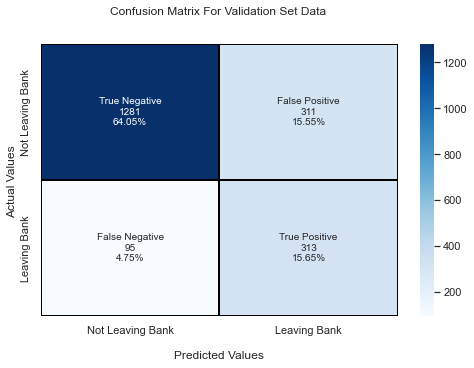

<IPython.core.display.Javascript object>

In [168]:
# Use function to get confusion matrix on test set
# make_confusion_matrix(model_1, X_test, y_test, "Test")
get_confusion_matrix(model_6, threshold=threshold_6)

####  G. Model 7 

- Adam Optimizer 
- HeUniform Weight Initialization 
- L1 Regularization

In [169]:
# Initialize weight
initializer = tf.keras.initializers.HeUniform()
# Regularize L1
regularizer = tf.keras.regularizers.l1(l1=0.01)
# Initializing the ANN
model_7 = Sequential()
model_7.add(
    Dense(
        activation="relu",
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
        input_shape=(X_train.shape[1],),
        units=64,
    )
)
model_7.add(
    Dense(
        32,
        activation="relu",
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
)
model_7.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [170]:
# Create optimizer with default learning rate
# Compile the model
opt_7 = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_7.compile(optimizer=opt_7, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()])
#model_1.compile(optimizer="SGD", loss="binary_crossentropy", metrics=['accuracy'])


<IPython.core.display.Javascript object>

In [171]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                896       
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [172]:
history_7 = model_7.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    # batch_size=32,
    verbose=0,
    class_weight={0: 0.2, 1: 0.8},
)

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 709us/step - loss: 0.6984 - recall_6: 1.0000


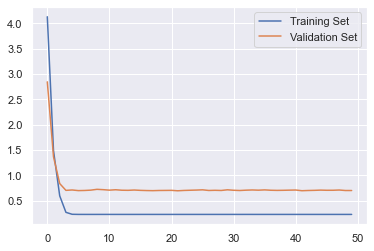

<IPython.core.display.Javascript object>

In [173]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_7.history)
hist["epoch"] = history_7.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("Training Set", "Validation Set"), loc=0)

# Printing results
results = model_7.evaluate(X_val, y_val)


Best Threshold=0.501651, G-Mean=0.581


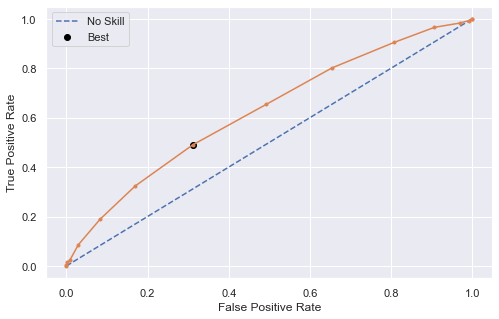

<IPython.core.display.Javascript object>

In [174]:
threshold_7, gmean_7 = plot_roc_auc(model_7, X_val, y_val)

In [175]:
# Accuracy as per the classification report
y_pred = model_7.predict(X_val)
y_pred = pd.Series(np.reshape(y_pred, -1))
y_pred = y_pred.apply(lambda x: 1 if x > threshold_7 else 0)
cr = metrics.classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1592
           1       0.33      0.32      0.33       408

    accuracy                           0.73      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.73      0.73      0.73      2000



<IPython.core.display.Javascript object>

In [176]:
# Using function to get accuracy, recall, precision and F1 on train and validation set
model_7_score = get_metrics_score(model_7, threshold=threshold_7)

Training Score  Validation Score
Accuracy         0.743500          0.727000
Recall           0.341244          0.323529
Precision        0.362294          0.328358
F1               0.351454          0.325926
ROC-AUC          0.593812          0.576966

<IPython.core.display.Javascript object>

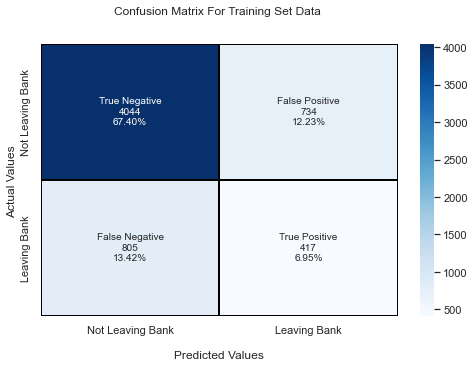

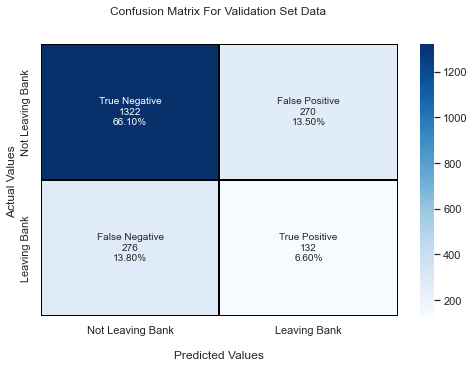

<IPython.core.display.Javascript object>

In [177]:
# Use function to get confusion matrix on test set
# make_confusion_matrix(model_1, X_test, y_test, "Test")
get_confusion_matrix(model_7, threshold=threshold_7)

####  H. Model 8 

- Adam Optimizer 
- HeUniform Weight Initialization 
- L2 Regularization

In [178]:
# Initialize weight
initializer = tf.keras.initializers.HeUniform()
# Regularize L1
regularizer = tf.keras.regularizers.l2(l2=0.01)
# Initializing the ANN
model_8 = Sequential()
model_8.add(
    Dense(
        activation="relu",
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
        input_shape=(X_train.shape[1],),
        units=64,
    )
)
model_8.add(
    Dense(
        32,
        activation="relu",
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
)
model_8.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [179]:
# Create optimizer with default learning rate
# Compile the model
opt_8 = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_8.compile(optimizer=opt_8, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()])
#model_1.compile(optimizer="SGD", loss="binary_crossentropy", metrics=['accuracy'])


<IPython.core.display.Javascript object>

In [180]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                896       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [181]:
history_8 = model_8.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    # batch_size=32,
    verbose=0,
    class_weight={0: 0.2, 1: 0.8},
)

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 780us/step - loss: 0.5396 - recall_7: 0.8358


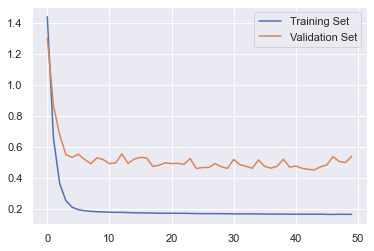

<IPython.core.display.Javascript object>

In [182]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_8.history)
hist["epoch"] = history_8.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("Training Set", "Validation Set"), loc=0)

# Printing results
results = model_8.evaluate(X_val, y_val)


Best Threshold=0.567917, G-Mean=0.785


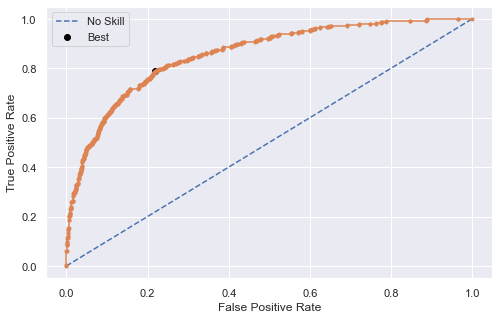

<IPython.core.display.Javascript object>

In [183]:
threshold_8, gmean_8 = plot_roc_auc(model_8, X_val, y_val)

In [184]:
# Accuracy as per the classification report
y_pred = model_8.predict(X_val)
y_pred = pd.Series(np.reshape(y_pred, -1))
y_pred = y_pred.apply(lambda x: 1 if x > threshold_8 else 0)
cr = metrics.classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1592
           1       0.48      0.79      0.60       408

    accuracy                           0.78      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.84      0.78      0.80      2000



<IPython.core.display.Javascript object>

In [185]:
# Using function to get accuracy, recall, precision and F1 on train and validation set
model_8_score = get_metrics_score(model_8, threshold=threshold_8)

Training Score  Validation Score
Accuracy         0.770667          0.782500
Recall           0.776596          0.786765
Precision        0.462476          0.479821
F1               0.579719          0.596100
ROC-AUC          0.772873          0.784086

<IPython.core.display.Javascript object>

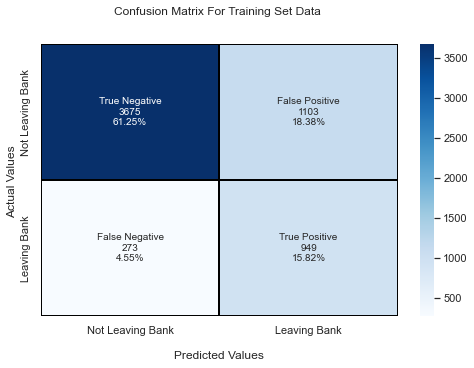

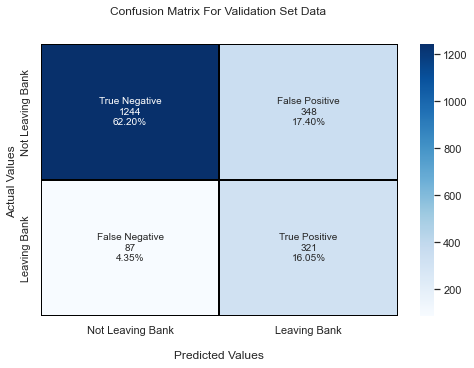

<IPython.core.display.Javascript object>

In [186]:
# Use function to get confusion matrix on test set
# make_confusion_matrix(model_1, X_test, y_test, "Test")
get_confusion_matrix(model_8, threshold=threshold_8)

In [187]:
model_performance_comparison(
    [(model_6, threshold_6), (model_7, threshold_7), (model_8, threshold_8)],
    ["Model 6 : Dropout", "Model 7 : L1 Regularization", "Model 8 : L2 Regularization"],
)

Model  Train_Accuracy  Validation_Accuracy  \
0            Model 6 : Dropout            0.82                 0.80   
1  Model 7 : L1 Regularization            0.74                 0.73   
2  Model 8 : L2 Regularization            0.77                 0.78   

   Train_Recall  Validation_Recall  Train_Precision  Validation_Precision  \
0          0.82               0.77             0.54                  0.50   
1          0.34               0.32             0.36                  0.33   
2          0.78               0.79             0.46                  0.48   

   Train_F1  Validation_F1  Train_ROC-AUC  Validation_ROC-AUC  
0      0.65           0.61           0.82                0.76  
1      0.35           0.33           0.59                0.59  
2      0.58           0.60           0.77                0.76

<IPython.core.display.Javascript object>

#### Observation : 

Looks like L2 regularization gives best results compared to Dropout and L1 regularization.

Try further model building with Batch Normalization technique

- BatchNormalization

####  I. Model 9 

- Adam Optimizer 
- HeUniform Weight Initialization 
- L2  Regularization 
- Batch Normalization

In [188]:
# Initialize weight
initializer = tf.keras.initializers.HeUniform()
# initializer = tf.keras.initializers.GlorotUniform()
# Regularize L2
regularizer = tf.keras.regularizers.l2(l2=0.01)
# Initializing the ANN
model_9 = Sequential()
model_9.add(InputLayer(input_shape=(X_train.shape[1],)))
model_9.add(BatchNormalization())
model_9.add(
    Dense(
        64,
        activation="relu",
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
)
model_9.add(BatchNormalization())
model_9.add(
    Dense(
        32,
        activation="relu",
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
)
model_9.add(BatchNormalization())
model_9.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [189]:
# Create optimizer with default learning rate
# Compile the model
opt_9 = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_9.compile(optimizer=opt_9, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()])
#model_1.compile(optimizer="SGD", loss="binary_crossentropy", metrics=['accuracy'])


<IPython.core.display.Javascript object>

In [190]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 13)               52        
 ormalization)                                                   
                                                                 
 dense_24 (Dense)            (None, 64)                896       
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                      

<IPython.core.display.Javascript object>

In [191]:
history_9 = model_9.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    # batch_size=32,
    verbose=0,
    class_weight={0: 0.2, 1: 0.8},
)

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 896us/step - loss: 0.4909 - recall_8: 0.7696


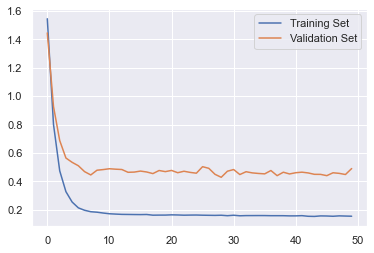

<IPython.core.display.Javascript object>

In [192]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_9.history)
hist["epoch"] = history_9.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("Training Set", "Validation Set"), loc=0)

# Printing results
results = model_9.evaluate(X_val, y_val)


Best Threshold=0.527633, G-Mean=0.781


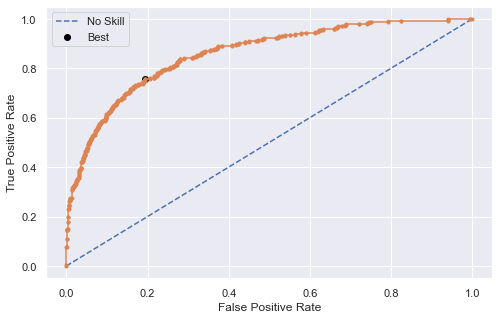

<IPython.core.display.Javascript object>

In [193]:
threshold_9, gmean_9 = plot_roc_auc(model_9, X_val, y_val)

In [194]:
# Accuracy as per the classification report
y_pred = model_9.predict(X_val)
y_pred = pd.Series(np.reshape(y_pred, -1))
y_pred = y_pred.apply(lambda x: 1 if x > threshold_9 else 0)
cr = metrics.classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1592
           1       0.50      0.75      0.60       408

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



<IPython.core.display.Javascript object>

In [195]:
# Using function to get accuracy, recall, precision and F1 on train and validation set
model_9_score = get_metrics_score(model_9, threshold=threshold_9)

Training Score  Validation Score
Accuracy         0.797500          0.795000
Recall           0.785597          0.754902
Precision        0.501830          0.498382
F1               0.612440          0.600390
ROC-AUC          0.793071          0.780089

<IPython.core.display.Javascript object>

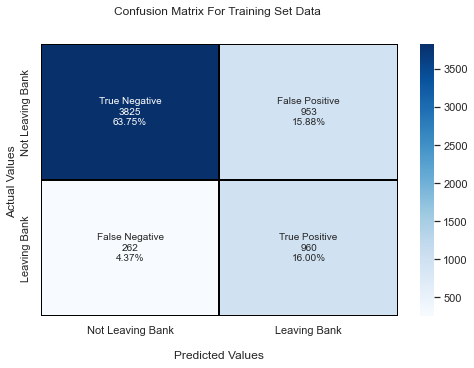

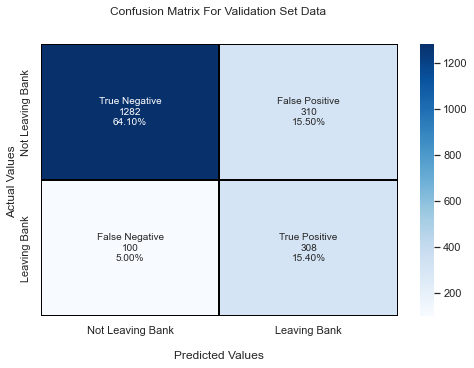

<IPython.core.display.Javascript object>

In [196]:
# Use function to get confusion matrix on test set
# make_confusion_matrix(model_1, X_test, y_test, "Test")
get_confusion_matrix(model_9, threshold=threshold_9)

#### Observation : 

Looks like Batch Normalization had improved results.

Try further model building with other techniques

- Callback (Early Stopping)

####  J. Model 10 

- Adam Optimizer 
- HeUniform Weight Initialization 
- L2 Regularization 
- Batch Normalization 
- Callback

In [197]:
# Initialize weight
initializer = tf.keras.initializers.HeUniform()
# Regularize L2
regularizer = tf.keras.regularizers.l2(l2=0.01)
# Initializing the ANN
model_10 = Sequential()
model_10.add(InputLayer(input_shape=(X_train.shape[1],)))
model_10.add(BatchNormalization())
model_10.add(
    Dense(
        64,
        activation="relu",
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
)
model_10.add(BatchNormalization())
model_10.add(
    Dense(
        32,
        activation="relu",
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
)
model_10.add(BatchNormalization())
model_10.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [198]:
# Create optimizer with default learning rate
# Compile the model
opt_10 = tf.keras.optimizers.Adam(learning_rate=1e-3)
#cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
cb = callbacks.EarlyStopping(monitor='val_loss', patience=5)
#reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)
model_10.compile(optimizer=opt_10, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()])
#model_1.compile(optimizer="SGD", loss="binary_crossentropy", metrics=['accuracy'])


<IPython.core.display.Javascript object>

In [199]:
model_10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 13)               52        
 hNormalization)                                                 
                                                                 
 dense_27 (Dense)            (None, 64)                896       
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                      

<IPython.core.display.Javascript object>

In [200]:
history_10 = model_10.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    # batch_size=32,
    verbose=0,
    class_weight={0: 0.2, 1: 0.8},
    # callbacks=[cb, reduce_lr],
    callbacks=[cb],
)

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 857us/step - loss: 0.4941 - recall_9: 0.7696


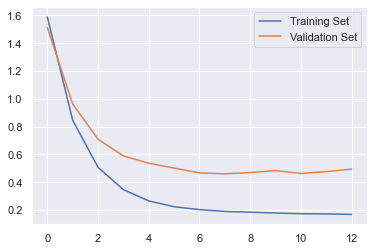

<IPython.core.display.Javascript object>

In [201]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_10.history)
hist["epoch"] = history_10.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("Training Set", "Validation Set"), loc=0)

# Printing results
results = model_10.evaluate(X_val, y_val)


Best Threshold=0.542767, G-Mean=0.778


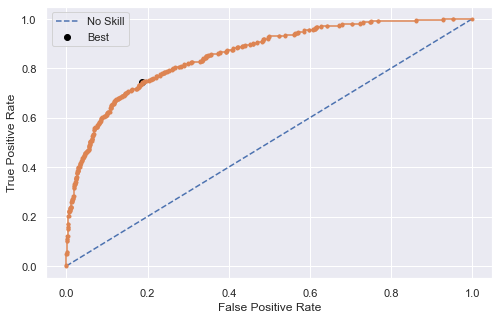

<IPython.core.display.Javascript object>

In [202]:
threshold_10, gmean_10 = plot_roc_auc(model_10, X_val, y_val)

In [203]:
# Accuracy as per the classification report
y_pred = model_10.predict(X_val)
y_pred = pd.Series(np.reshape(y_pred, -1))
y_pred = y_pred.apply(lambda x: 1 if x > threshold_10 else 0)
cr = metrics.classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.87      1592
           1       0.51      0.74      0.60       408

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



<IPython.core.display.Javascript object>

In [204]:
# Using function to get accuracy, recall, precision and F1 on train and validation set
model_10_score = get_metrics_score(model_10, threshold=threshold_10)

Training Score  Validation Score
Accuracy         0.804833          0.799000
Recall           0.764321          0.740196
Precision        0.514034          0.505017
F1               0.614676          0.600398
ROC-AUC          0.789758          0.777133

<IPython.core.display.Javascript object>

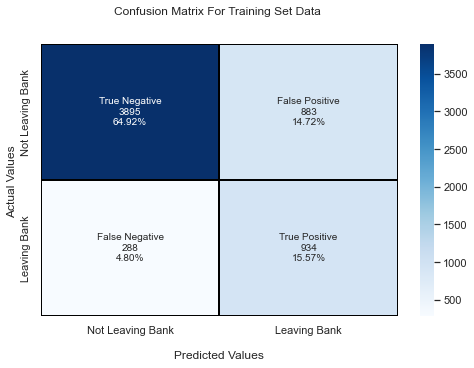

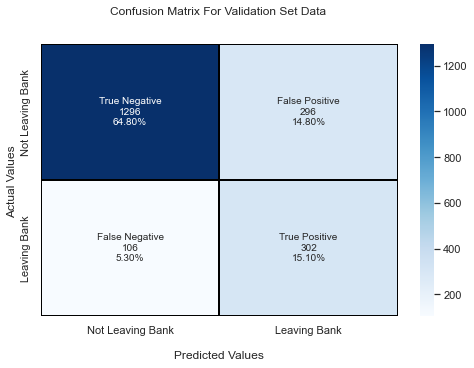

<IPython.core.display.Javascript object>

In [205]:
# Use function to get confusion matrix on test set
# make_confusion_matrix(model_1, X_test, y_test, "Test")
get_confusion_matrix(model_10, threshold=threshold_10)

### 8. Model Hyperparameter Tuning<a id='8. Model Hyperparameter Tuning'></a>

#### A. RandomizedSearchCV Tuning<a id='A. RandomizedSearchCV Tuning'></a>

####  K. Model 11 

- Adam Optimizer 
- HeUniform Weight Initialization 
- L2  Regularization 
- Batch Normalization
- RandomizedSearchCV

In [206]:
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.001, neurons_1=64, neurons_2=32, activation_fn='relu'):
    # create model
    # Initialize weight
    if activation_fn=='relu':
        initializer = tf.keras.initializers.HeUniform()
    else:
        initializer = tf.keras.initializers.GlorotUniform()
        
    # Regularize L1
    regularizer = tf.keras.regularizers.l2(l2=0.01)
    # Initializing the ANN
    model_tuned = Sequential()
    model_tuned.add(InputLayer(input_shape=(X_train.shape[1],)))
    model_tuned.add(BatchNormalization())
    model_tuned.add(
    Dense(
        neurons_1,
        activation=activation_fn,
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
    )
    model_tuned.add(BatchNormalization())
    model_tuned.add(
    Dense(
        neurons_2,
        activation=activation_fn,
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
    )
    model_tuned.add(BatchNormalization())
    model_tuned.add(Dense(1, activation="sigmoid"))

    # Compile model
    opt = tf.keras.optimizers.Adam(learning_rate=learn_rate)
    model_tuned.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()])
    return model_tuned



<IPython.core.display.Javascript object>

In [207]:
# Wrap model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_model)

<IPython.core.display.Javascript object>

In [208]:
# define the grid search parameters
hyperparameters = dict(
    learn_rate=[1e-2, 1e-3, 1e-4],
    neurons_1=[16, 32, 64],
    neurons_2=[16, 32, 64],
    activation_fn=["relu", "sigmoid", "tanh"],
)
hyperparameters

{'learn_rate': [0.01, 0.001, 0.0001],
 'neurons_1': [16, 32, 64],
 'neurons_2': [16, 32, 64],
 'activation_fn': ['relu', 'sigmoid', 'tanh']}

<IPython.core.display.Javascript object>

In [209]:
# Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(tf.keras.metrics.Recall())
scorer = metrics.make_scorer(metrics.recall_score)

random = RandomizedSearchCV(
    estimator=neural_network,
    verbose=0,
    cv=10,
    param_distributions=hyperparameters,
    n_jobs=-1,
    scoring=scorer,
    n_iter=20,
)

<IPython.core.display.Javascript object>

In [210]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

<IPython.core.display.Javascript object>

In [211]:
%%time
random_result = random.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=0,
    class_weight={0: 0.2, 1: 0.8},
    callbacks=[stop_early],
)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

params = random_result.cv_results_["params"]

Best: 0.774271 using {'neurons_2': 16, 'neurons_1': 16, 'learn_rate': 0.01, 'activation_fn': 'relu'}
CPU times: user 5.2 s, sys: 859 ms, total: 6.06 s
Wall time: 8min 56s


<IPython.core.display.Javascript object>

In [212]:
# Initialize weight
initializer = tf.keras.initializers.HeUniform()
# Regularize L2
regularizer = tf.keras.regularizers.l2(l2=0.01)
# Initializing the ANN
model_11 = Sequential()
model_11.add(InputLayer(input_shape=(X_train.shape[1],)))
model_11.add(BatchNormalization())
model_11.add(
    Dense(
        random_result.best_params_["neurons_1"],
        activation=random_result.best_params_["activation_fn"],
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
)
model_11.add(BatchNormalization())
model_11.add(
    Dense(
        random_result.best_params_["neurons_2"],
        activation=random_result.best_params_["activation_fn"],
        kernel_initializer=initializer,
        kernel_regularizer=regularizer,
    )
)
model_11.add(BatchNormalization())
model_11.add(Dense(1, activation="sigmoid"))

# Compile model
opt_11 = tf.keras.optimizers.Adam(
    learning_rate=random_result.best_params_["learn_rate"]
)
model_11.compile(
    optimizer=opt_11,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.Recall()],
)

<IPython.core.display.Javascript object>

In [247]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_9 (Batc  (None, 13)               52        
 hNormalization)                                                 
                                                                 
 dense_33 (Dense)            (None, 16)                224       
                                                                 
 batch_normalization_10 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_34 (Dense)            (None, 16)                272       
                                                                 
 batch_normalization_11 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                     

<IPython.core.display.Javascript object>

In [213]:
history_11 = model_11.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    # batch_size=32,
    verbose=0,
    class_weight={0: 0.2, 1: 0.8},
    callbacks=[stop_early],
)

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 797us/step - loss: 0.5452 - recall_11: 0.8064


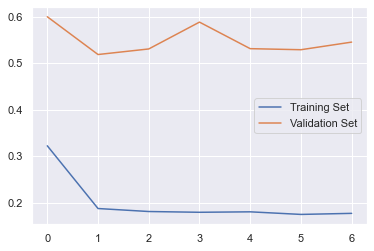

<IPython.core.display.Javascript object>

In [214]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_11.history)
hist["epoch"] = history_11.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("Training Set", "Validation Set"), loc=0)

# Printing results
results = model_11.evaluate(X_val, y_val)


Best Threshold=0.528927, G-Mean=0.773


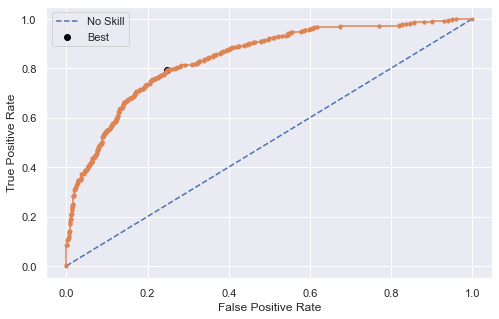

<IPython.core.display.Javascript object>

In [215]:
threshold_11, gmean_11 = plot_roc_auc(model_11, X_val, y_val)

In [216]:
# Accuracy as per the classification report
y_pred = model_11.predict(X_val)
y_pred = pd.Series(np.reshape(y_pred, -1))
y_pred = y_pred.apply(lambda x: 1 if x > threshold_11 else 0)
cr = metrics.classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1592
           1       0.45      0.79      0.57       408

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.76      0.78      2000



<IPython.core.display.Javascript object>

In [217]:
# Using function to get accuracy, recall, precision and F1 on train and validation set
model_11_score = get_metrics_score(model_11, threshold=threshold_11)

Training Score  Validation Score
Accuracy         0.755167          0.760500
Recall           0.777414          0.791667
Precision        0.442478          0.450488
F1               0.563966          0.574222
ROC-AUC          0.763445          0.772090

<IPython.core.display.Javascript object>

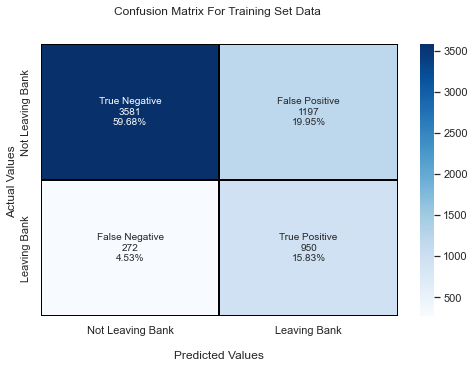

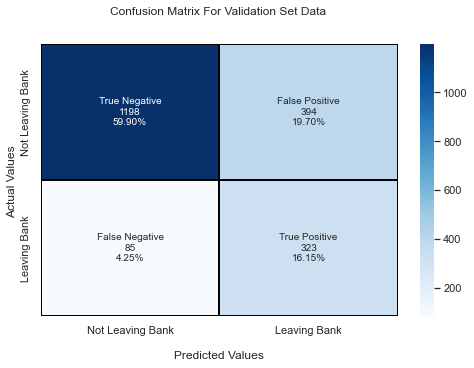

<IPython.core.display.Javascript object>

In [218]:
# Use function to get confusion matrix on test set
# make_confusion_matrix(model_1, X_test, y_test, "Test")
get_confusion_matrix(model_11, threshold=threshold_11)

#### B. KerasTuner Tuning<a id='B. KerasTuner Tuning'></a>

####  L. Model 12

- Adam Optimizer 
- HeUniform Weight Initialization 
- L2  Regularization 
- Batch Normalization
- KerasTuner

In [219]:
def model_builder(hp):

    # Tune the number of units in the first Dense layer
    hp_units_1 = hp.Int("units1", min_value=16, max_value=64, step=16)
    hp_units_2 = hp.Int("units2", min_value=16, max_value=64, step=16)

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

    # Tune the activation function for the optimizer
    hp_activation = hp.Choice(
        name="activation", values=["relu", "tanh", "sigmoid"], ordered=False
    )

    # Initialize weight
    initializer = tf.keras.initializers.HeUniform()

    # Regularize L2
    regularizer = tf.keras.regularizers.l2(l2=0.01)

    model = Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(
        Dense(
            units=hp_units_1,
            activation=hp_activation,
            kernel_initializer=initializer,
            kernel_regularizer=regularizer,
        )
    )
    model.add(BatchNormalization())
    model.add(
        Dense(
            units=hp_units_2,
            activation=hp_activation,
            kernel_initializer=initializer,
            kernel_regularizer=regularizer,
        )
    )
    model.add(BatchNormalization())
    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        # optimizer=tf.keras.optimizers.SGD(learning_rate=hp_learning_rate, momentum=0.9),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.Recall()],
        # weighted_metrics={0: 0.2, 1: 0.8},
    )

    return model

<IPython.core.display.Javascript object>

In [220]:
tuner = kt.Hyperband(
    model_builder,
    objective=kt.Objective("val_recall", direction="max"),
    max_epochs=50,
    overwrite=True,
)

<IPython.core.display.Javascript object>

In [221]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

<IPython.core.display.Javascript object>

In [222]:
tuner.search(
    X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[stop_early]
)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(
    f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units1')} and in second densely-connected layer is {best_hps.get('units1')}. The optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}. The optimal activation function is {best_hps.get('activation')}. 
"""
)

Trial 90 Complete [00h 00m 06s]
val_recall: 0.5759803652763367

Best val_recall So Far: 0.9828431606292725
Total elapsed time: 00h 06m 00s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 48 and in second densely-connected layer is 48. The optimal learning rate for the optimizer
is 0.0001. The optimal activation function is sigmoid. 



<IPython.core.display.Javascript object>

In [253]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_12 = tuner.hypermodel.build(best_hps)
history = model_12.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),class_weight={0: 0.2, 1: 0.8},verbose=0,callbacks=[stop_early] )


<IPython.core.display.Javascript object>

In [254]:
val_acc_per_epoch = history.history["val_loss"]
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print("Best epoch: %d" % (best_epoch,))

Best epoch: 1


<IPython.core.display.Javascript object>

In [255]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(
    X_train,
    y_train,
    epochs=best_epoch,
    validation_data=(X_val, y_val),
    class_weight={0: 0.2, 1: 0.8},
    callbacks=[stop_early],
)

188/188 [==============================] - 1s 3ms/step - loss: 2.0952 - recall_6: 0.6007 - val_loss: 2.5750 - val_recall_6: 0.9338


<IPython.core.display.Javascript object>

In [257]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

63/63 [==============================] - 0s 749us/step - loss: 2.5721 - recall_6: 0.9410
[test loss, test accuracy]: [2.572108745574951, 0.9410319328308105]


<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 710us/step - loss: 2.5750 - recall_6: 0.9338


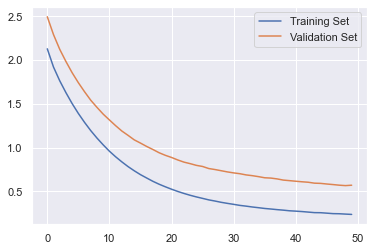

<IPython.core.display.Javascript object>

In [258]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("Training Set", "Validation Set"), loc=0)

# Printing results
results = model_12.evaluate(X_val, y_val)


Best Threshold=0.457497, G-Mean=0.761


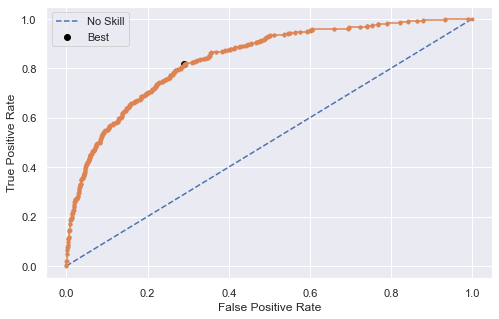

<IPython.core.display.Javascript object>

In [262]:
threshold_12, gmean_12 = plot_roc_auc(model_12, X_val, y_val)

In [263]:
# Accuracy as per the classification report
y_pred = model_12.predict(X_val)
y_pred = pd.Series(np.reshape(y_pred, -1))
y_pred = y_pred.apply(lambda x: 1 if x > threshold_12 else 0)
cr = metrics.classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.71      0.81      1592
           1       0.42      0.81      0.55       408

    accuracy                           0.73      2000
   macro avg       0.68      0.76      0.68      2000
weighted avg       0.83      0.73      0.76      2000



<IPython.core.display.Javascript object>

In [264]:
# Using function to get accuracy, recall, precision and F1 on train and validation set
model_12_score = get_metrics_score(model_12, threshold=threshold_12)

Training Score  Validation Score
Accuracy         0.727833          0.731500
Recall           0.800327          0.813725
Precision        0.413181          0.418663
F1               0.544999          0.552873
ROC-AUC          0.754810          0.762076

<IPython.core.display.Javascript object>

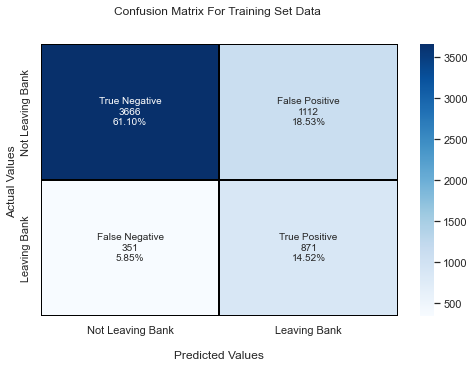

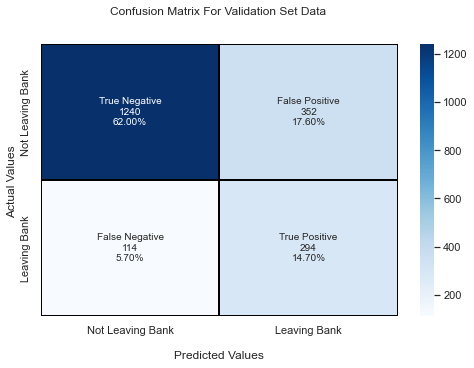

<IPython.core.display.Javascript object>

In [243]:
# Use function to get confusion matrix on test set
# make_confusion_matrix(model_1, X_test, y_test, "Test")
get_confusion_matrix(model_12, threshold=threshold_12)

### 9. Model Performance Evaluation<a id='9. Model Performance Evaluation'></a>

In [232]:
model_performance_comparison(
    [
        (model_1, threshold_1),
        (model_2, threshold_2),
        (model_3, threshold_3),
        (model_4, threshold_4),
        (model_5, threshold_5),
        (model_6, threshold_6),
        (model_7, threshold_7),
        (model_8, threshold_8),
        (model_9, threshold_9),
        (model_10, threshold_10),
        (model_11, threshold_11),
        (model_12, threshold_12),
    ],
    [
        "Model 1",
        "Model 2",
        "Model 3",
        "Model 4",
        "Model 5",
        "Model 6",
        "Model 7",
        "Model 8",
        "Model 9",
        "Model 10",
        "Model 11",
        "Model 12",
    ],
)

Model  Train_Accuracy  Validation_Accuracy  Train_Recall  \
0    Model 1            0.78                 0.79          0.76   
1    Model 2            0.82                 0.76          0.90   
2    Model 3            0.85                 0.78          0.90   
3    Model 4            0.88                 0.78          0.91   
4    Model 5            0.84                 0.76          0.95   
5    Model 6            0.82                 0.80          0.82   
6    Model 7            0.74                 0.73          0.34   
7    Model 8            0.77                 0.78          0.78   
8    Model 9            0.80                 0.80          0.79   
9   Model 10            0.80                 0.80          0.76   
10  Model 11            0.76                 0.76          0.78   
11  Model 12            0.77                 0.78          0.75   

    Validation_Recall  Train_Precision  Validation_Precision  Train_F1  \
0                0.75             0.48                  0.49      0.59   
1                0.74             0.54                  0.45      0.67   
2                0.70             0.59                  0.47      0.71   
3                0.67             0.64                  0.47      0.75   
4                0.73             0.56                  0.44      0.71   
5                0.77             0.54                  0.50      0.65   
6                0.32             0.36                  0.33      0.35   
7                0.79             0.46                  0.48      0.58   
8                0.75             0.50                  0.50      0.61   
9                0.74             0.51                  0.51      0.61   
10               0.79             0.44                  0.45      0.56   
11               0.76             0.46                  0.47      0.57   

    Validation_F1  Train_ROC-AUC  Validation_ROC-AUC  
0            0.59           0.77                0.75  
1            0.56           0.85                0.75  
2            0.56           0.87                0.74  
3            0.55           0.89                0.74  
4            0.55           0.88                0.74  
5            0.61           0.82                0.76  
6            0.33           0.59                0.59  
7            0.60           0.77                0.76  
8            0.60           0.79                0.77  
9            0.60           0.79                0.76  
10           0.57           0.76                0.75  
11           0.58           0.76                0.75

<IPython.core.display.Javascript object>

#### Observation : 

1. Performance of three tuned models on various metrics has been displayed.
2. Recall score is our right metric as per business case.
3. **Model 11 tuned by RandomizedSearchCV gives good recall score of 0.78 in testing set and 0.79 in validation set. This model is not overfitted and generalises well in training and validation sets. This model is a best fit and a good suggestion for production.**

#### Test Final Model

In [245]:
# Using function to get accuracy, recall, precision and F1 on train and validation set
model_11_score = get_metrics_score(model_11, threshold=threshold_11, include_test=True)

Training Score  Validation Score  Testing Score
Accuracy         0.755167          0.760500       0.748000
Recall           0.777414          0.791667       0.766585
Precision        0.442478          0.450488       0.432732
F1               0.563966          0.574222       0.553191
ROC-AUC          0.763445          0.772090       0.754918

<IPython.core.display.Javascript object>

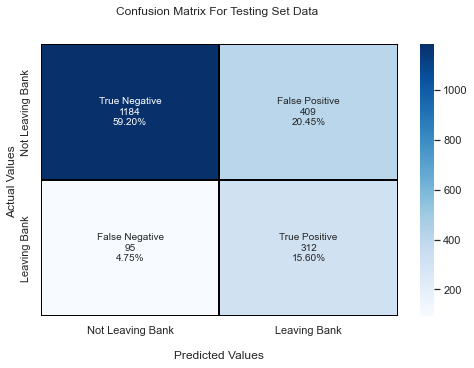

<IPython.core.display.Javascript object>

In [246]:
make_confusion_matrix(model_11, X_test, y_test, "Testing Set", threshold=threshold_11)

### 10. Conclusion and key takeaways<a id='10. Conclusion and key takeaways'></a>

### Conclusion:

**B. Model evaluation criterion :**

#### Model can make wrong predictions as:

1) Predicting a customer will churn but in reality the customer would not churn. - Loss of resources for marketing/sales or contacting customers.

2) Predicting a customer will not churn but in reality the customer would have churn. - Loss of customer/revenue.

#### Which case is more important?

Second case is important. If we predict a customer will not churn but in reality the customer would churn, then company will loose customer and revenue.

#### How to reduce this loss i.e need to reduce False Negatives?

recall should be maximized, the greater the recall higher the chances of minimizing the false negatives.


**Best Model :** Model 12 tuned in Keras Tuner gives good recall score of 0.75 in testing set and 0.76 in validation set. This model is not overfitted and generalises well in training and validation sets. This model is a best fit and a good suggestion for production.


### Insights :

1) All customers having credit score less than 400 had churned.

2) Customers in "Germany" had left bank within six months more than other geographical locations.

3) Customers in age range from 41-50, 51-60 and 61-70 had churned more.

4) Customers with balance more than 200001 had churned more.

5) Customers with 4 products had churned completely. Also, customers with 3 products had churned mostly.


###  Recommendations :

1) Provide better banking options to customers having less credit scores.

2) Improve services in "Germany" where customers had churned most.

3) Provide better services to customers in age range from 41-50, 51-60 and 61-70.

4) Provide more banking options to customers with balance more than 200001.

5) Improve services of products to customers.
